<a href="https://colab.research.google.com/github/GabrielVideira/pos-tech-dados/blob/main/TC_fase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge**

Tech Challenge é o projeto que englobará os conhecimentos obtidos em todas as disciplinas da fase. Esta é uma atividade que, em princípio, deve ser desenvolvida em grupo.

Importante atentar-se ao prazo de entrega, pois trata-se de uma atividade obrigatória, uma vez que sua pontuação se refere a 90% da nota final.


Imagine agora, que você vai atuar como Expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o mundo todo. Sua área é recém-criada dentro da empresa, e você será responsável pelos relatórios iniciais a serem apresentados em uma reunião de investidores e acionistas, explicando a quantidade de vinhos exportados e os fatores externos que podem vir a surgir e que interferem nas análises:
1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.


O Head de Dados pediu para que você construísse uma tabela contendo
as seguintes informações:

1. País de origem (Brasil).
2. País de destino.
3. Quantidade em litros de vinho exportado (utilize: 1KG =1L).
4. Valor em US$.

Os dados que lhe forneceram são de uma vinícola parceira, e podem ser
encontrados aqui: http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

Seu objetivo é dizer o montante de venda de exportação nos últimos 15
anos, separando a análise por país e trazendo quais as prospecções futuras e
possíveis ações para uma melhoria nas exportações.

Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.



***Dica: para construir uma boa análise, utilize várias bases do mesmo site!
Outro ponto interessante, é utilizar os dados externos citados acima para
enriquecer ainda mais a mensagem que você quer passar.***

## **Conhecendo e tratando dados Embrapa Produzidos e Comercializados**

**Dados da Vitinicultura**

A <b>Embrapa Uva e Vinho</b> apresenta em seu site(http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01) iformações referentes à quantidade de uvas processadas, produção e comercialização de vinhos, suco e derivados provenientes do Estado do Rio Grande do Sul, que representa mais de 90% da produção nacional. Apresentam também os dados de importações e portações dos produtos da vitivinicultura.

Alguns esclarecimentos se fazem necessários, para que os usuários façam o uso correto das informações:

* Os vinhos nacionais são classificados para fins estatísticos em vinho de mesa (elaborados com uvas americanas e/ou híbridas), vinho fino de mesa (elaborados com uvas Vitis Vinifera L.) e vinho especial (corte de vinho de mesa e fino de mesa).

* Os vinhos importados, denominados de vinhos de mesa são equivalentes aos * vinhos finos de mesa nacionais, pois são elaborados com uvas Vitis Vinifera L.

* Os dados constantes da base de dados ALICEweb, referentes à vinhos e espumantes são expressos em quilos, no entanto considerando que a densidade desses produtos é de aproximadamente um (1), consideramos 1 Kg = 1L.

* Os arquivos de download possuem a extensão CSV, para facilitar a importação em planilhas ou banco de dados.

In [ ]:
# Bibliotecas usadas
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
mock_vinibrasil = pd.read_csv("/content/mock_vinibrasil.csv", encoding='utf-8', sep=';')
mock_vinibrasil['Litros Exportados (1000 hl)'] = mock_vinibrasil['Litros Exportados (1000 hl)'].str.replace(',', '.', regex=True)
mock_vinibrasil['preço/litro'] = mock_vinibrasil['preço/litro'].str.replace(',', '.', regex=True)
colunas_para_dividir = ['Litros Exportados (1000 hl)', 'Litros', 'Valor em Dólares']
mock_vinibrasil[colunas_para_dividir] = mock_vinibrasil[colunas_para_dividir].apply(pd.to_numeric, errors='coerce')
mock_vinibrasil[colunas_para_dividir] = mock_vinibrasil[colunas_para_dividir] / 4
mock_vinibrasil['Ano'] = mock_vinibrasil['Ano'].fillna(0).astype(int)
mock_vinibrasil

,Ano,Litros Exportados (1000 hl),Litros,Valor em Dólares,preço/litro,País
0,2009,0.01,500.00,1335.00,2.67,Estados Unidos
1,2009,0.00,250.00,505.00,2.02,Japão
2,2010,0.01,1250.00,3337.50,2.67,Estados Unidos
3,2010,0.01,750.00,4125.00,5.5,Canadá
4,2011,0.02,1875.00,5006.25,2.67,Estados Unidos
5,2011,0.01,1250.00,4787.50,3.83,Reino Unido
6,2012,0.03,2500.00,13750.00,5.5,Canadá
7,2012,0.01,1250.00,2525.00,2.02,Japão
8,2013,0.03,3000.00,11490.00,3.83,Reino Unido
9,2013,0.03,2500.00,4775.00,1.91,China


In [ ]:
mock_vinibrasil.tail()

,Ano,Litros Exportados (1000 hl),Litros,Valor em Dólares,preço/litro,País
25,2021,0.20,20000.00,53400.00,2.67,Estados Unidos
26,2022,0.23,22500.00,45450.00,2.02,Japão
27,2022,0.12,12500.00,47875.00,3.83,Reino Unido
28,2023,0.25,25000.00,66750.00,2.67,Estados Unidos
29,2023,0.25,25000.00,95750.00,3.83,Reino Unido


In [ ]:
sales_by_country = mock_vinibrasil.groupby('País')['Litros'].sum().sort_values(ascending=False)

sales_by_country

,Litros
País,
Reino Unido,76750.00
Estados Unidos,71125.00
Japão,49000.00
Canadá,28250.00
China,22500.00
Alemanha,3750.00


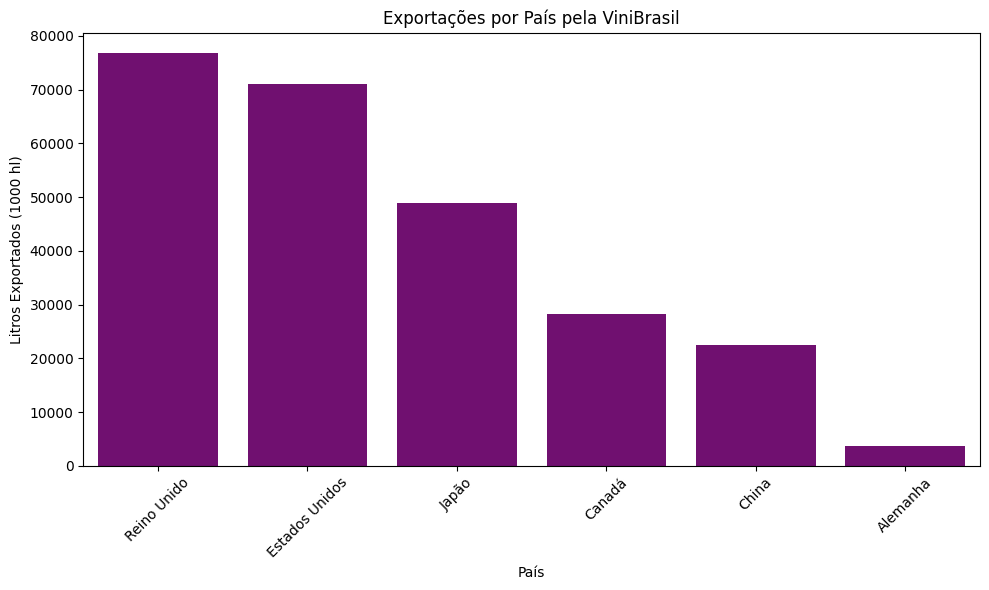

In [ ]:
sales_by_country = sales_by_country.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.index, y=sales_by_country.values, color='#800080')
plt.title('Exportações por País pela ViniBrasil')
plt.xlabel('País')
plt.ylabel('Litros Exportados (1000 hl)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
dolar_by_country = mock_vinibrasil.groupby('País')['Valor em Dólares'].sum().sort_values(ascending=False)

dolar_by_country

,Valor em Dólares
País,
Reino Unido,293952.50
Estados Unidos,189903.75
Canadá,155375.00
Japão,98980.00
China,42975.00
Alemanha,10575.00


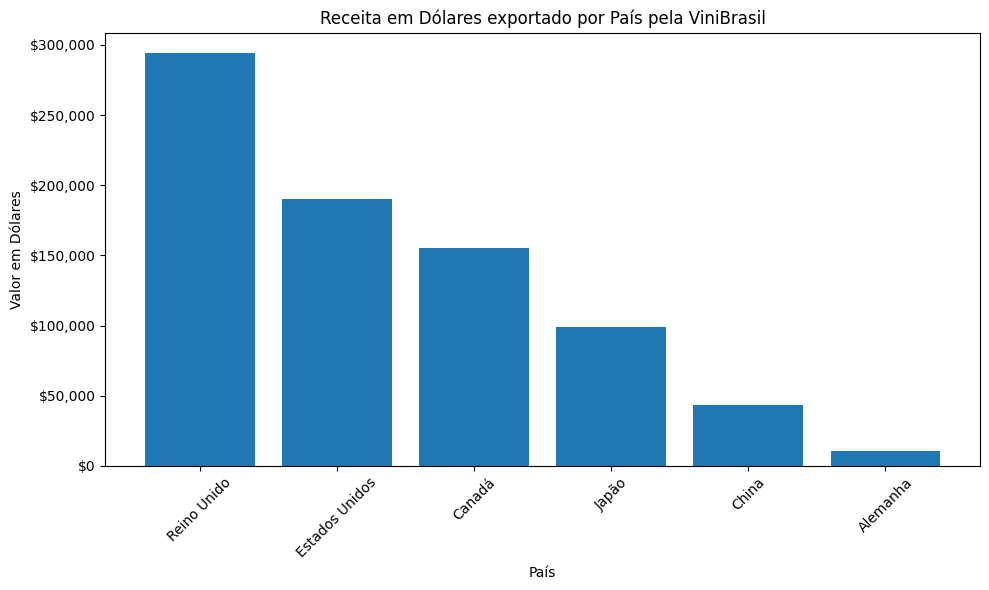

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(dolar_by_country.index, dolar_by_country.values)
plt.xlabel('País')
plt.ylabel('Valor em Dólares')
plt.title('Receita em Dólares exportado por País pela ViniBrasil')
plt.xticks(rotation=45)

formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [ ]:
mock_vinibrasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano                          30 non-null     int64  
 1   Litros Exportados (1000 hl)  30 non-null     float64
 2   Litros                       30 non-null     float64
 3   Valor em Dólares             30 non-null     float64
 4   preço/litro                  30 non-null     object 
 5   País                         30 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ KB


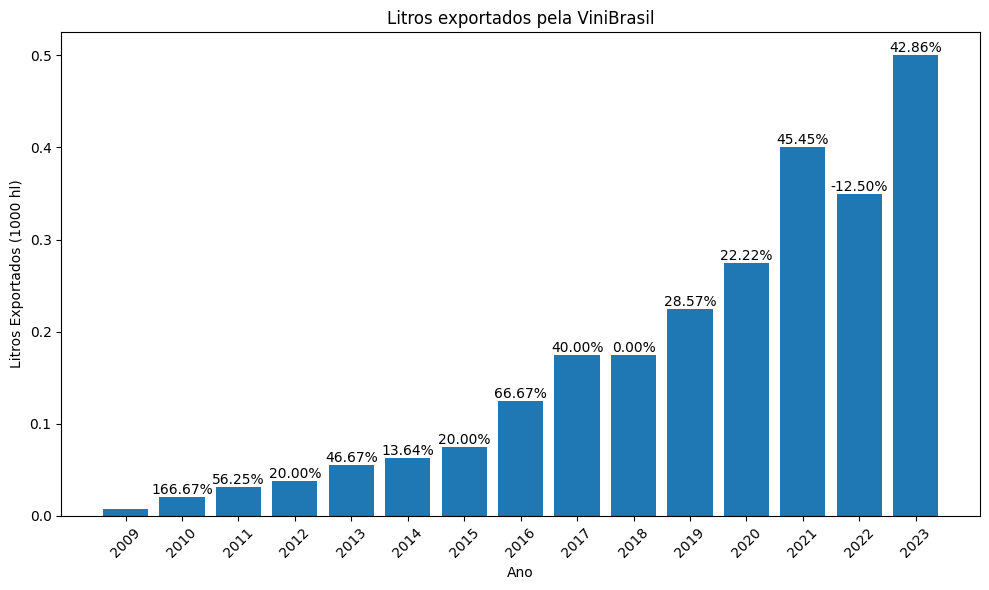

In [ ]:
mock_vinibrasil['Litros'] = pd.to_numeric(mock_vinibrasil['Litros Exportados (1000 hl)'], errors='coerce')
litros_por_ano = mock_vinibrasil.groupby('Ano')['Litros'].sum()

plt.figure(figsize=(10, 6))
plt.bar(litros_por_ano.index, litros_por_ano.values)
plt.xlabel('Ano')
plt.ylabel('Litros Exportados (1000 hl)')
plt.title('Litros exportados pela ViniBrasil')

plt.xticks(litros_por_ano.index, rotation=45)
plt.tight_layout()

previous_value = litros_por_ano.iloc[0]
for i, value in enumerate(litros_por_ano.iloc[1:]):
    percentage_change = ((value - previous_value) / previous_value) * 100
    plt.text(litros_por_ano.index[i+1], value, f'{percentage_change:.2f}%', ha='center', va='bottom')
    previous_value = value

plt.show()

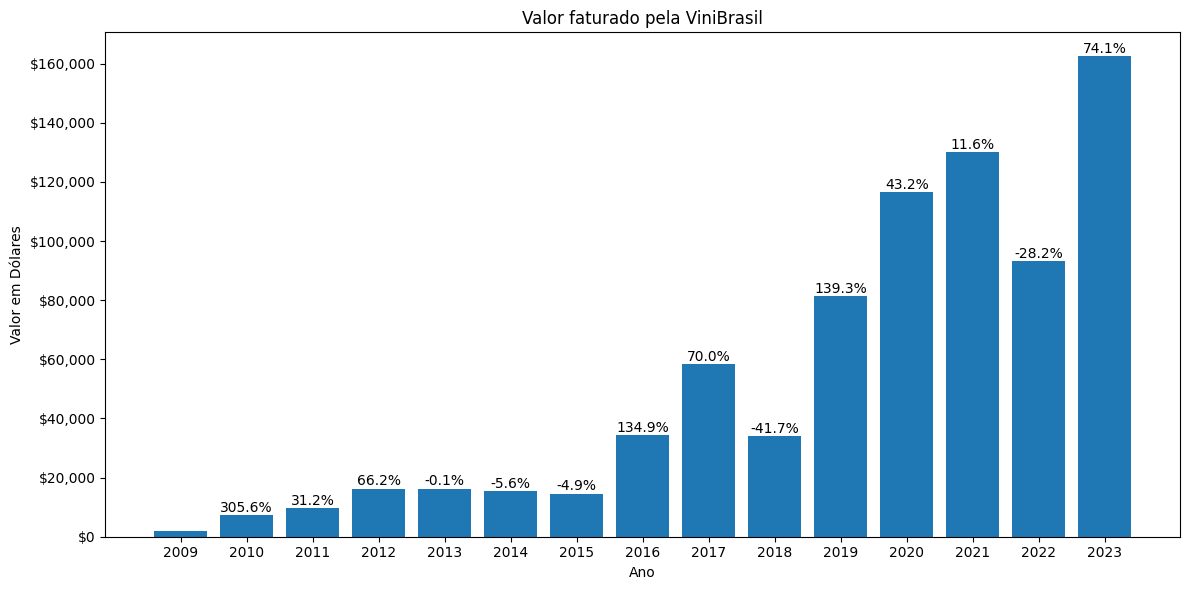

In [ ]:
mock_vinibrasil['Valor em Dólares'] = pd.to_numeric(mock_vinibrasil['Valor em Dólares'], errors='coerce')
mock_vinibrasil['Ano'] = pd.to_numeric(mock_vinibrasil['Ano'], errors='coerce').astype(int)

valor_por_ano = mock_vinibrasil.groupby('Ano')['Valor em Dólares'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(valor_por_ano.index, valor_por_ano.values)
plt.xlabel('Ano')
plt.ylabel('Valor em Dólares')
plt.title('Valor faturado pela ViniBrasil')

formatter = ticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

for i, v in enumerate(valor_por_ano):
    if i > 0:
        previous_value = valor_por_ano.iloc[i - 1]
        percentage_change = ((v - previous_value) / previous_value) * 100
        plt.text(valor_por_ano.index[i], v + 50, f'{percentage_change:.1f}%', ha='center', va='bottom')

plt.xticks(valor_por_ano.index)
plt.tight_layout()
plt.show()

In [ ]:
sales_by_country = mock_vinibrasil.groupby('País')['Litros Exportados (1000 hl)'].sum()


sales_by_country

,Litros Exportados (1000 hl)
País,
Alemanha,0.04
Canadá,0.28
China,0.23
Estados Unidos,0.71
Japão,0.49
Reino Unido,0.77


# Importando os pacotes e datasets necessários

In [ ]:
# importando a base de dados produção
df_prod = pd.read_csv("https://raw.githubusercontent.com/GabrielVideira/pos-fase-1/refs/heads/main/dados/Producao.csv", encoding='utf-8', sep=';')
df_prod = df_prod.drop(columns=['id', 'control'])
df_prod.produto = df_prod.produto.str.title()
df_prod = df_prod.set_index('produto')
df_prod = df_prod.iloc[:,-15:]
# Colunas usadas serão a de controle(contem os tipos de uva/vinho) e o restante são os anos.
# Os resultados das linhas são litros Ex: na coluna 1970 linha 0 foram produzidos 217.208.604 litros.
# Estarei usando somente os ultimos 15 anos como o desafio diz exatamente isso

In [ ]:
#importando a base de dados comercio
df_comercio = pd.read_csv("https://raw.githubusercontent.com/GabrielVideira/pos-fase-1/refs/heads/main/dados/Comercio.csv", encoding='utf-8', sep=';')
df_comercio = df_comercio.drop(columns=['id', 'control'])
df_comercio.Produto = df_comercio.Produto.str.title()
df_comercio = df_comercio.set_index('Produto')
df_comercio = df_comercio.iloc[:,-15:]
# Colunas usadas serão a de controle(contem os tipos de uva/vinho) e o restante são os anos.
# Os resultados das linhas são litros Ex: na coluna 1970 linha 0 foram comercializados 98.327.606 litros.
# Estarei usando somente os ultimos 15 anos como o desafio diz exatamente isso


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df_prod.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
produto,,,,,,,,,,,,,,,
Vinho De Mesa,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
Vinho Fino De Mesa (Vinifera),39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


In [ ]:
df_prod.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,13404775.06,12604329.14,18060873.22,16815749.02,14574065.45,14677186.47,17360851.53,7864719.37,19052227.02,16382465.22,15801539.53,12490674.16,19111323.53,17523675.04,17952661.57
std,38037817.54,36181490.27,49003037.74,42960744.41,38089760.21,37982768.38,43530934.32,19403148.50,50842599.71,43798130.95,38338729.81,29146188.05,45710748.97,43520443.24,44266361.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,221.00,0.00,0.00
50%,0.00,5817.00,0.00,0.00,100.00,2700.00,922.00,0.00,3000.00,2000.00,32519.00,46000.00,30000.00,5000.00,17200.00
75%,1271458.50,1548057.00,2100003.50,2380510.50,1598361.00,1504279.00,1536993.00,1033047.50,1759016.00,1533595.00,1757118.50,2747322.00,3824399.50,3138015.50,3974682.00
max,205418206.00,195267980.00,257840749.00,212777037.00,196904222.00,196173123.00,210308560.00,86319015.00,255015187.00,218375636.00,144629737.00,124200414.00,173899995.00,195031611.00,174716647.00


In [ ]:
df_comercio.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Produto,,,,,,,,,,,,,,,
Vinho De Mesa,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
Tinto,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
Rosado,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
Branco,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
Vinho Fino De Mesa,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [ ]:
df_comercio.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,10960489.56,10375917.13,10847644.94,10380151.44,11626082.74,11084658.15,11489827.16,9416294.85,9850568.58,10461880.74,13447368.79,14400380.56,14773220.19,14390021.53,14578660.32
std,38609159.55,36883602.37,38539834.08,34748250.96,37876890.36,36058896.55,37614328.08,30157122.12,32198775.72,34194519.73,38323443.64,42045619.34,41593781.74,39205023.74,40386573.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.50,2856.75,1953.25,2379.75,4161.75,2377.50
50%,29035.00,56751.00,124616.00,81295.00,96060.00,80673.00,119040.50,66048.50,55967.00,121457.00,338717.50,198860.50,328257.50,294542.00,378391.00
75%,2872296.00,3238676.00,3288837.50,3923090.75,3645965.75,3906140.25,3343750.00,2935857.50,2694804.50,3332817.50,5321690.00,5815971.25,5620649.50,5221489.25,4773561.00
max,234525979.00,221242945.00,230310468.00,206969571.00,221590810.00,206404427.00,209198468.00,166769622.00,176059959.00,177186273.00,180446489.00,215557931.00,210012238.00,187939996.00,187016848.00


## **Litros produzidos x Comercializados**

In [ ]:
df_prod_sum = df_prod.sum()

Text(0, 0.5, 'Litros')

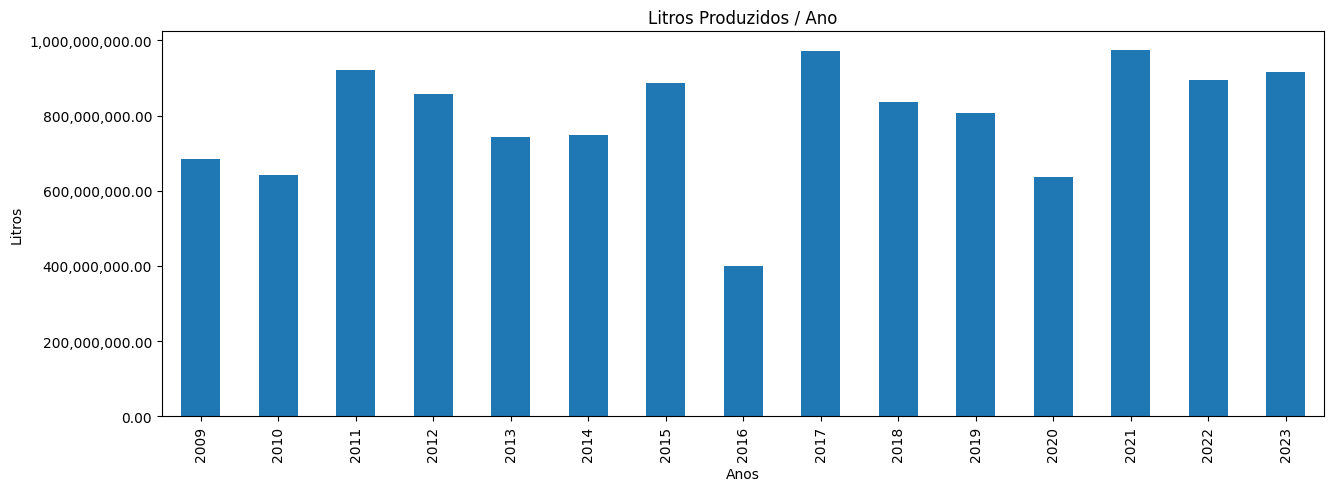

In [ ]:
axis = df_prod_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Produzidos / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

In [ ]:
df_comercio_sum = df_comercio.sum()

Text(0, 0.5, 'Litros')

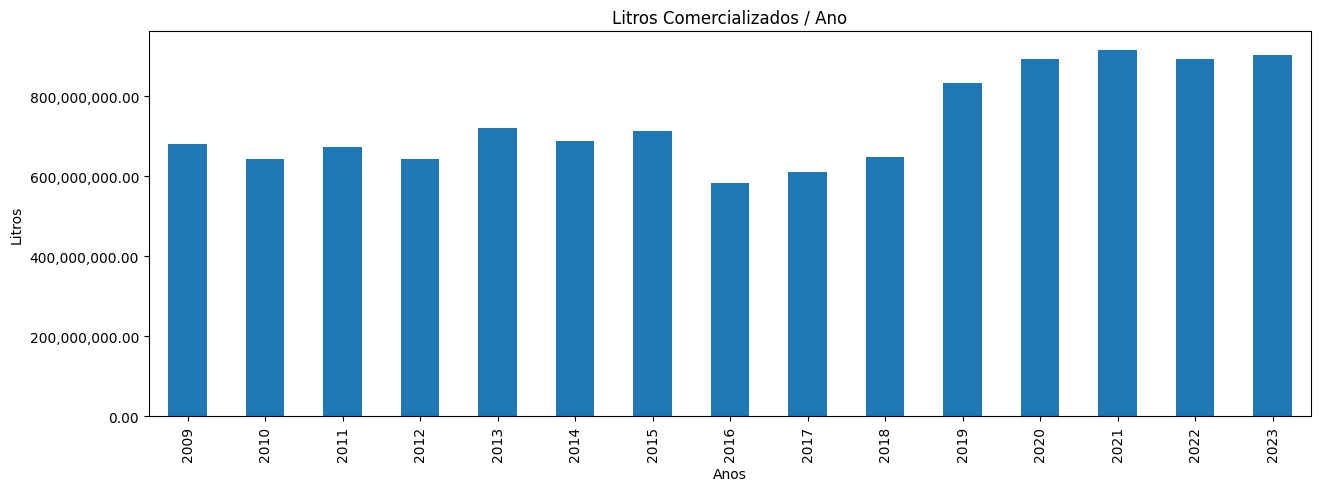

In [ ]:
axis = df_comercio_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

<ipython-input-78-fb1d26acf0d7>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  previous_value = df_comercio_sum[0]


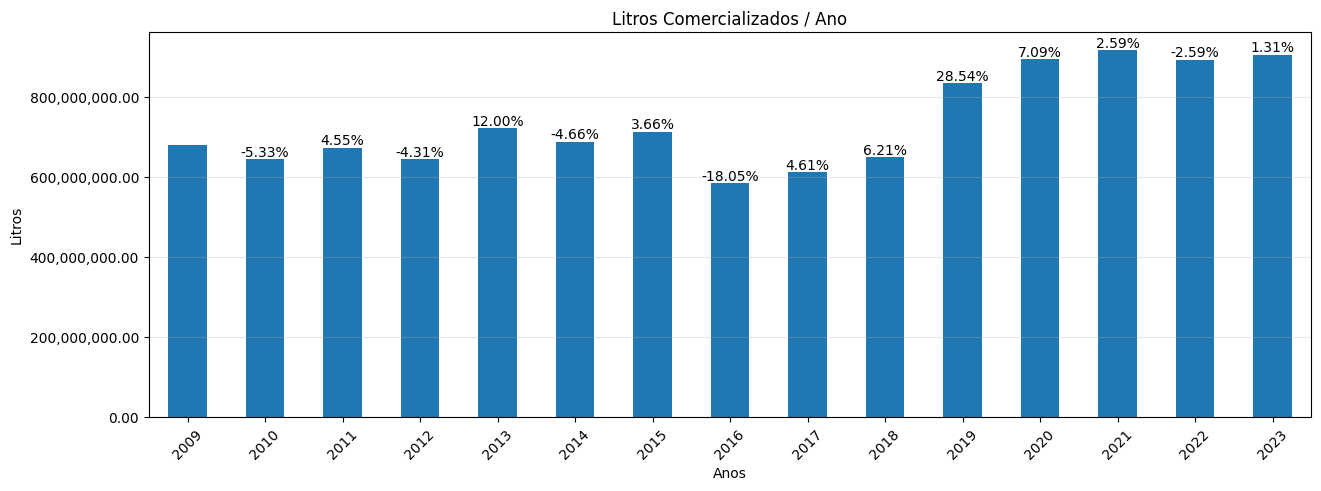

In [ ]:
axis = df_comercio_sum.plot(kind='bar', figsize=(15,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.xticks(rotation=45)
plt.ylabel('Litros')
plt.grid(True, axis='y', alpha=0.3)

previous_value = df_comercio_sum[0]
for i, value in enumerate(df_comercio_sum[1:], start=1):
    percentage_change = ((value - previous_value) / previous_value) * 100
    plt.text(i, value, f'{percentage_change:.2f}%', ha='center', va='bottom', color='black')
    previous_value = value

In [ ]:

valor_2009 = df_comercio_sum.loc['2009']
valor_2023 = df_comercio_sum.loc['2023']
percentage_diff = ((valor_2023 - valor_2009) / valor_2009) * 100

print(f'Houve um aumento de {percentage_diff:.2f}% no comercio de vinho nesses últimos 15 anos.')

Houve um aumento de 33.01% no comercio de vinho nesses últimos 15 anos.


## **Tipos de Uva/Vinhos**

In [ ]:
df_prod['Total'] = df_prod.sum(axis=1)
df_prod_sorted = df_prod.sort_values(by='Total', ascending=False)
df_prod_sorted.Total.head(10)
# Top 10 produtos mais produzidos em litros de todos os tempos

,Total
produto,
Vinho De Mesa,2841923901
Tinto,2136239854
Derivados,1504774677
Mosto Simples,1380108518
Suco,1024463379
Branco,648254980
Suco De Uva Integral,588274403
Vinho Fino De Mesa (Vinifera),587604482
Suco De Uva Concentrado,431011445


In [ ]:
df_prod_sorted = df_prod_sorted.drop(columns=['Total'])
df_prod_sorted_head = df_prod_sorted.head(5)
df_prod_sorted_t = df_prod_sorted_head.T

Text(0, 0.5, 'Litros')

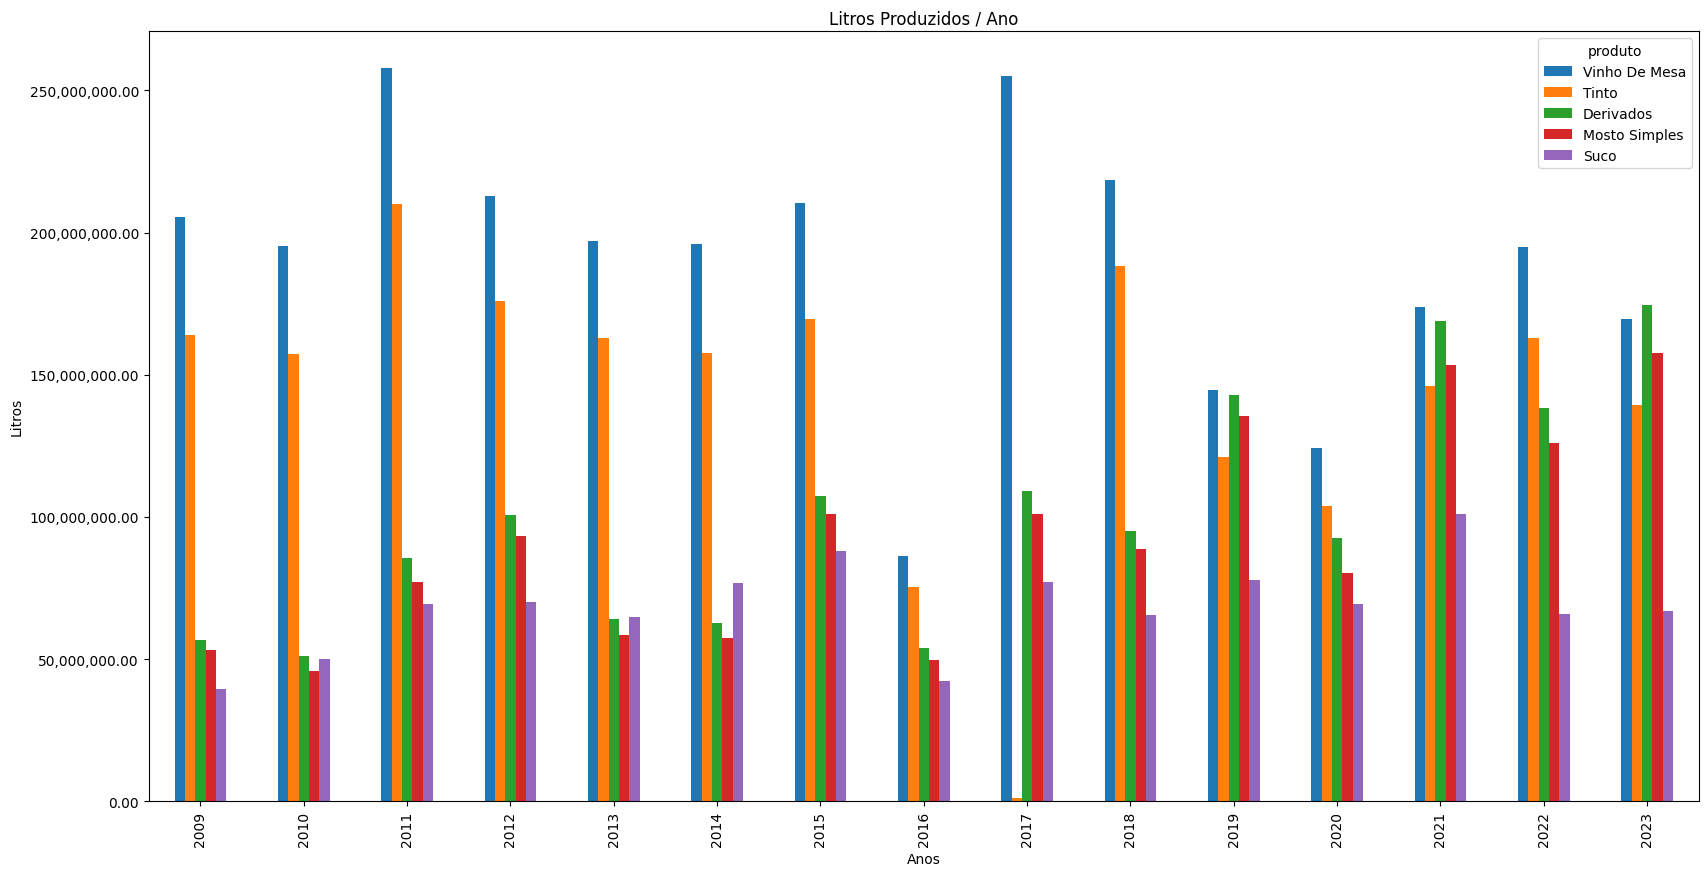

In [ ]:
axis = df_prod_sorted_t.plot(kind='bar', figsize=(20,10))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Produzidos / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

In [ ]:
df_comercio['Total'] = df_comercio.sum(axis=1)
df_comercio_sorted = df_comercio.sort_values(by='Total', ascending=False)
df_comercio_sorted.Total.head(10)
# Top 10 produtos mais comercializados em litros de todos os tempos

,Total
Produto,
Vinho De Mesa,3031232024
Tinto,2620475609
Suco De Uvas,1547015869
Suco Natural Integral,606070377
Suco De Uvas Concentrado,472372673
Outros Produtos Comercializados,454393836
Branco,384609720
Vinho Fino De Mesa,322916556
Espumantes,292420204


In [ ]:
df_comercio_sorted = df_comercio_sorted.drop(columns=['Total'])
df_comercio_sorted_head = df_comercio_sorted.head(5)
df_comercio_sorted_t = df_comercio_sorted_head.T

Text(0, 0.5, 'Litros')

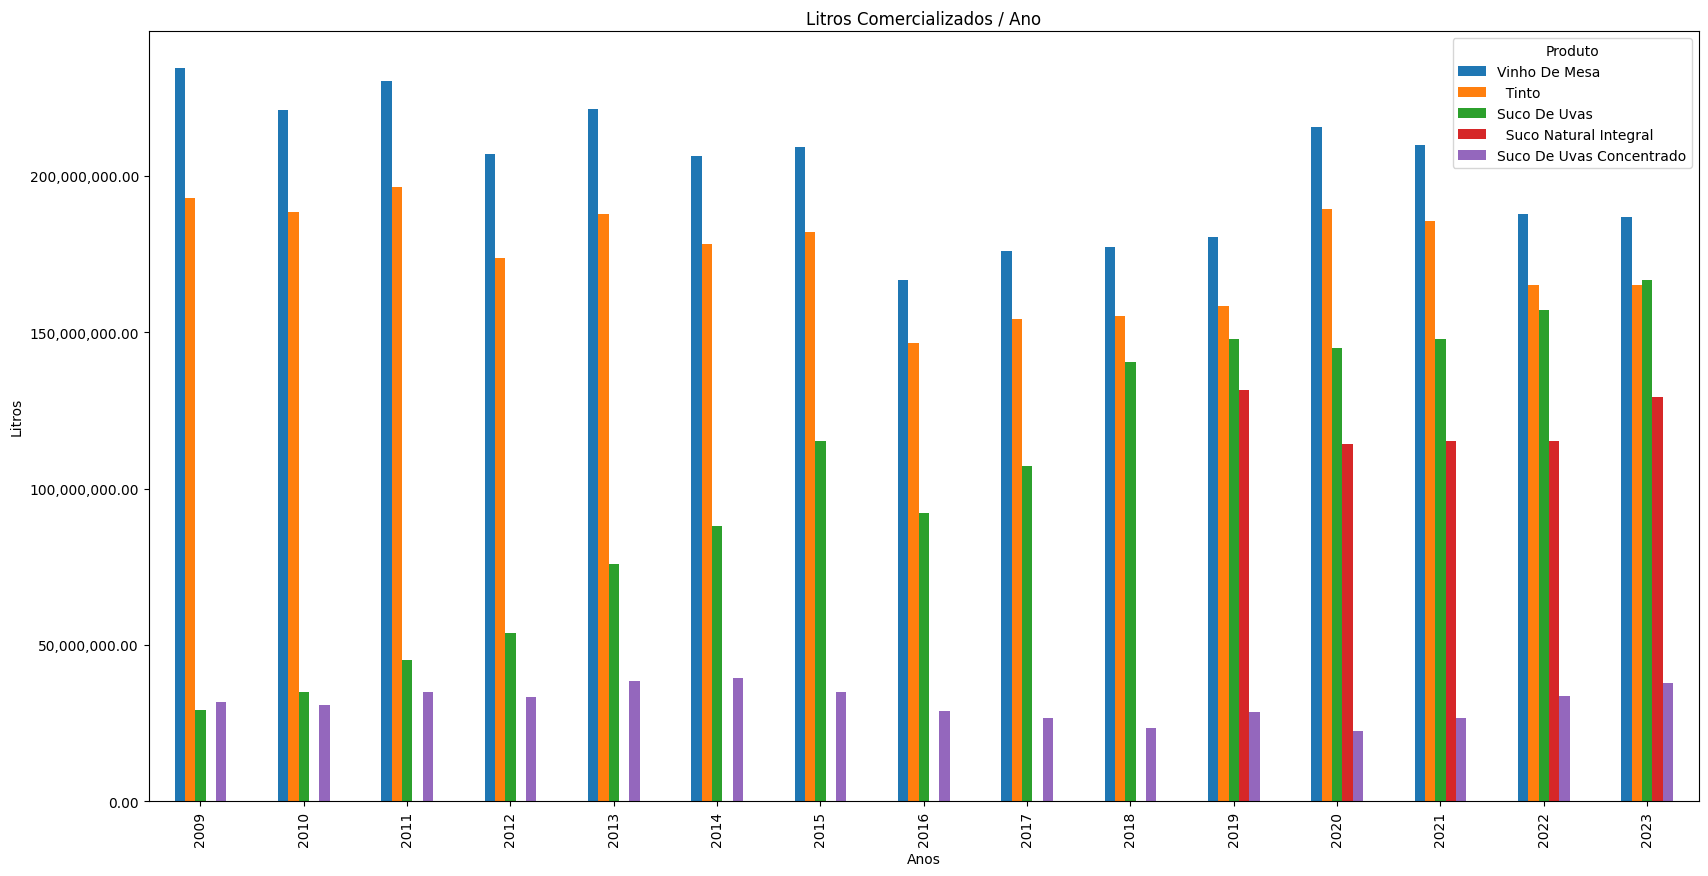

In [ ]:
axis = df_comercio_sorted_t.plot(kind='bar', figsize=(20,10))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title('Litros Comercializados / Ano')
plt.xlabel('Anos')
plt.ylabel('Litros')

## **(teste)Juntando informações de diferentes bases**

In [ ]:
df_geral = pd.read_csv("https://raw.githubusercontent.com/GabrielVideira/pos-fase-1/refs/heads/main/dados/Producao.csv", encoding='utf-8', sep=';')
df_geral = df_geral.drop(columns=['id', 'control'])
df_geral.produto = df_geral.produto.str.title()
df_geral

,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Vinho De Mesa,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,Vinho Fino De Mesa (Vinifera),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,15000671,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,17640081,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,4110181,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336
8,Suco,1097771,2296654,3509440,0,0,0,0,0,0,...,76723537,87894468,42210389,77161971,65467906,77805352,69261287,100932264,65809079,67045238
9,Suco De Uva Integral,1097771,2296654,3509440,0,0,0,0,0,0,...,43331223,52233155,31117869,46865626,34367996,50239767,40718523,68038479,35248305,38122173


In [ ]:
df_comercio = pd.read_csv("https://raw.githubusercontent.com/GabrielVideira/pos-fase-1/refs/heads/main/dados/Comercio.csv", encoding='utf-8', sep=';')
df_comercio = df_comercio.drop(columns=['id', 'control'])
df_comercio.Produto = df_comercio.Produto.str.title()
df_comercio = df_comercio.rename(columns={'Produto':'produto'})
df_geral = pd.merge(df_geral, df_comercio, on='produto')
df_geral

,produto,1970_x,1971_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,...,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y
0,Vinho De Mesa,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,...,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,Vinho Orgânico,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2554,10718,18686,14947,9123


In [ ]:
df_geral = pd.melt(df_geral, id_vars=['produto'], var_name='ano', value_name='litros')

In [ ]:
df_geral.head()

,produto,ano,litros
0,Vinho De Mesa,1970_x,217208604
1,Vinho Orgânico,1970_x,0
2,Vinho De Mesa,1971_x,154264651
3,Vinho Orgânico,1971_x,0
4,Vinho De Mesa,1972_x,146953297


In [ ]:
df_geral.tail()

,produto,ano,litros
211,Vinho Orgânico,2021_y,18686
212,Vinho De Mesa,2022_y,187939996
213,Vinho Orgânico,2022_y,14947
214,Vinho De Mesa,2023_y,187016848
215,Vinho Orgânico,2023_y,9123


In [ ]:
caracter_eliminar = ['_y', '_x']
for caracter in caracter_eliminar:
  df_geral['ano'] = df_geral['ano'].str.replace(caracter, '', regex=False)

In [ ]:
df_geral.head()

,produto,ano,litros
0,Vinho De Mesa,1970,217208604
1,Vinho Orgânico,1970,0
2,Vinho De Mesa,1971,154264651
3,Vinho Orgânico,1971,0
4,Vinho De Mesa,1972,146953297


In [ ]:
df_geral.tail()

,produto,ano,litros
211,Vinho Orgânico,2021,18686
212,Vinho De Mesa,2022,187939996
213,Vinho Orgânico,2022,14947
214,Vinho De Mesa,2023,187016848
215,Vinho Orgânico,2023,9123


A idéia seria focar nas buscas de exportaçoes. Vou tentar juntar as exportaçoes e importaçoes de todos os produtos q derivam da uva

## **Conhecendo e tratando dados de vinhos Exportados**

In [ ]:
# As colunas de ano se repetem. Pelo q vi na base a 1 seria a qntdd em L(ou Kg)
# e a 2 o valor em dolares.

# Idealmente precisariamos usar o melt para separar esses valores.

df_expVinho = pd.read_csv("https://raw.githubusercontent.com/GabrielVideira/pos-fase-1/refs/heads/main/dados/ExpVinho.csv", encoding='utf-8', sep=';')
df_expVinho = df_expVinho.drop(columns=['Id'])
df_expVinho = df_expVinho.drop(df_expVinho.columns[1:77], axis=1)
df_expVinho = df_expVinho.set_index('País')
df_expVinho.head()

,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,117,698
"Alemanha, República Democrática",265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,...,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
Angola,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,...,345,1065,0,0,0,0,4068,4761,0,0
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_expVinho_litros = df_expVinho.iloc[:,::2]
df_expVinho_litros

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,26,4,0,0,117
"Alemanha, República Democrática",265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698,7630,4806
Angola,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0,4068,0
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Uruguai,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774,637117,326093
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0


In [ ]:
df_expVinho_dolares = df_expVinho.iloc[:,1::2]
df_expVinho_dolares.columns = df_expVinho_dolares.columns.str.replace('.1', '', regex=False)
df_expVinho_dolares

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
País,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,0,95,21,0,0,698
"Alemanha, República Democrática",429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853
Angola,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0
Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Uruguai,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842,997367,454271
Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0


In [ ]:
df_expVinho_litros_sum = df_expVinho_litros.sum()
df_expVinho_dolares_sum = df_expVinho_dolares.sum()

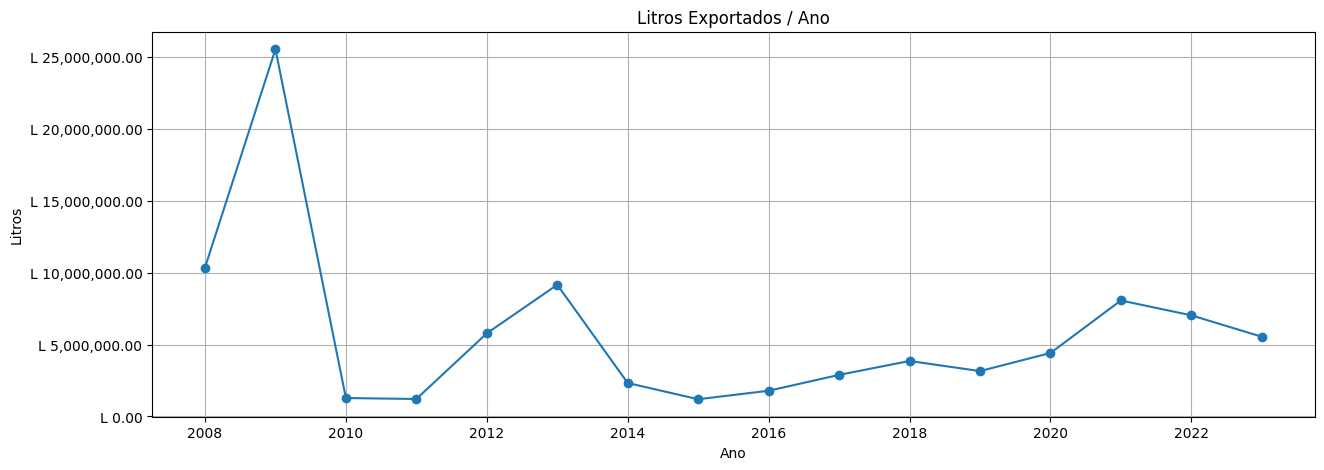

In [ ]:
# Precisamos verificar o porque desse volume gigante de litros exportados
# no periodo de 2008 e 2009

axis = df_expVinho_litros_sum.plot(kind='line', figsize=(15,5), marker='o')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('L {x:,.2f}'))
plt.title('Litros Exportados / Ano')
plt.ylabel('Litros')
plt.xlabel('Ano')
# for i, value in enumerate(df_expVinho_litros_sum):
#     axis.text(i, value, f'R$ {value:,.2f}', fontsize=9, ha='center', va='bottom', color='black')
plt.grid(True)
plt.show()

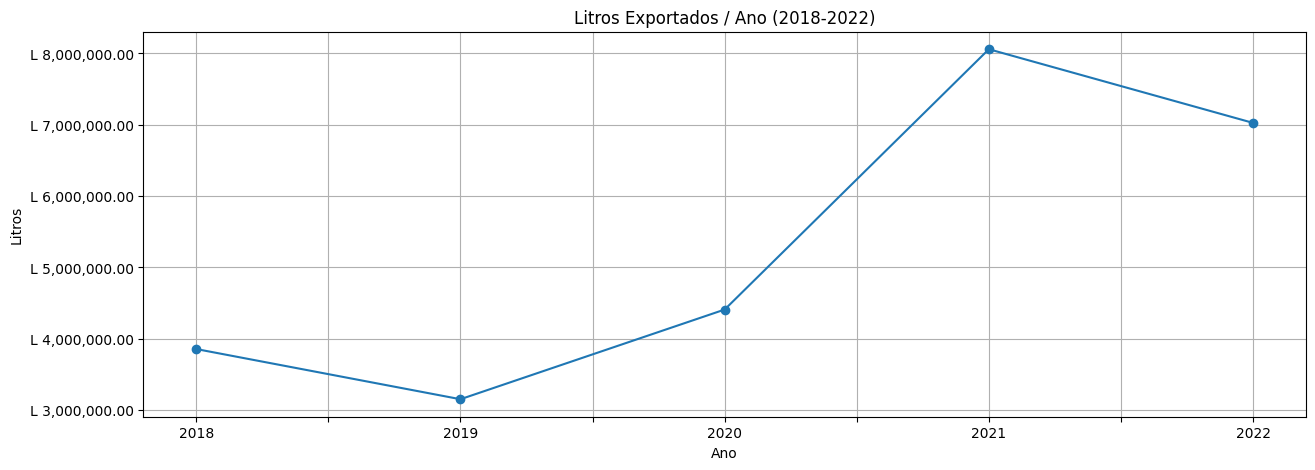

In [ ]:
axis = df_expVinho_litros_sum['2018':'2022'].plot(kind='line', figsize=(15,5), marker='o')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('L {x:,.2f}'))
plt.title('Litros Exportados / Ano (2018-2022)')
plt.ylabel('Litros')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

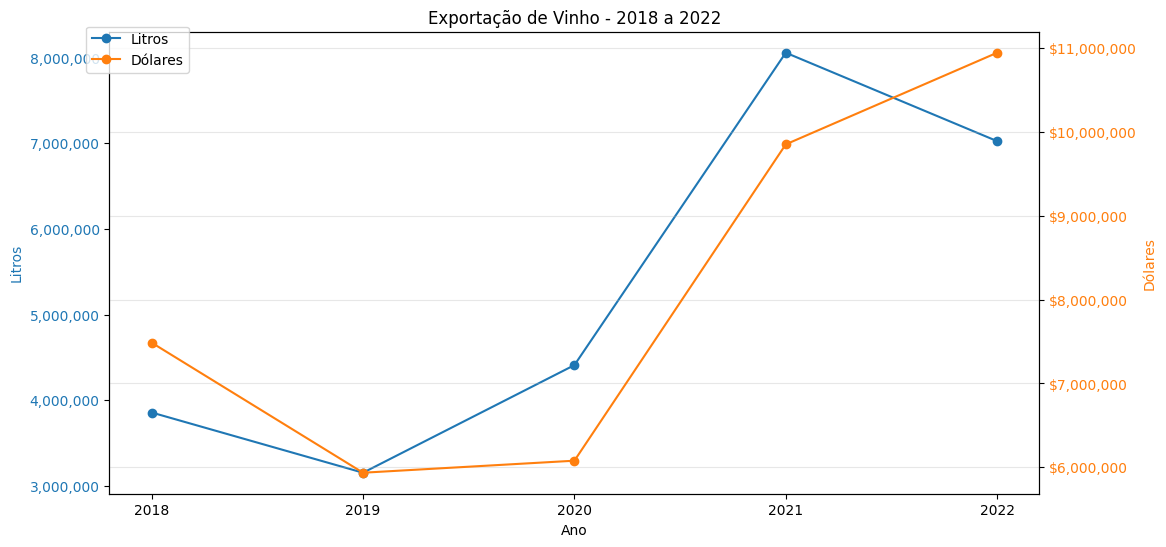

In [ ]:
df_expVinho_litros_sum_filtered = df_expVinho_litros_sum['2018':'2022']
df_expVinho_dolares_sum_filtered = df_expVinho_dolares_sum['2018':'2022']

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_expVinho_litros_sum_filtered.index, df_expVinho_litros_sum_filtered.values, marker='o', color='tab:blue', label='Litros')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Litros', color='tab:blue')
ax1.tick_params('y', labelcolor='tab:blue')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax2 = ax1.twinx()
ax2.plot(df_expVinho_dolares_sum_filtered.index, df_expVinho_dolares_sum_filtered.values, marker='o', color='tab:orange', label='Dólares')
ax2.set_ylabel('Dólares', color='tab:orange')
ax2.tick_params('y', labelcolor='tab:orange')
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.title('Exportação de Vinho - 2018 a 2022')
plt.grid(True, alpha=0.3)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

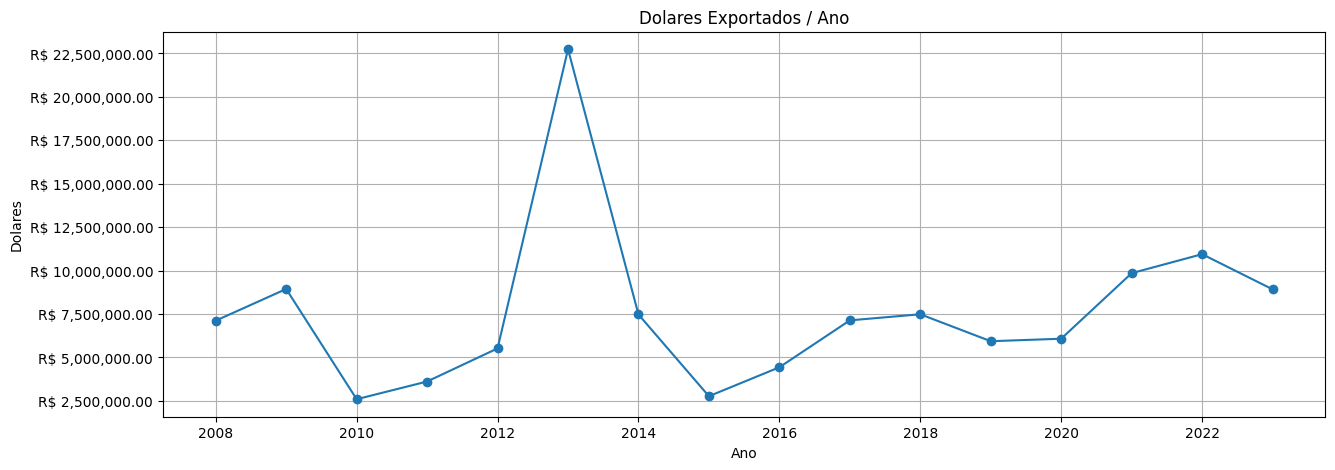

In [ ]:
axis = df_expVinho_dolares_sum.plot(kind='line', figsize=(15,5), marker='o')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.title('Dolares Exportados / Ano')
plt.ylabel('Dolares')
plt.xlabel('Ano')
# for i, value in enumerate(df_expVinho_dolares_sum):
#     axis.text(i, value, f'R$ {value:,.2f}', fontsize=9, ha='center', va='bottom', color='black')
plt.grid(True)
plt.show()


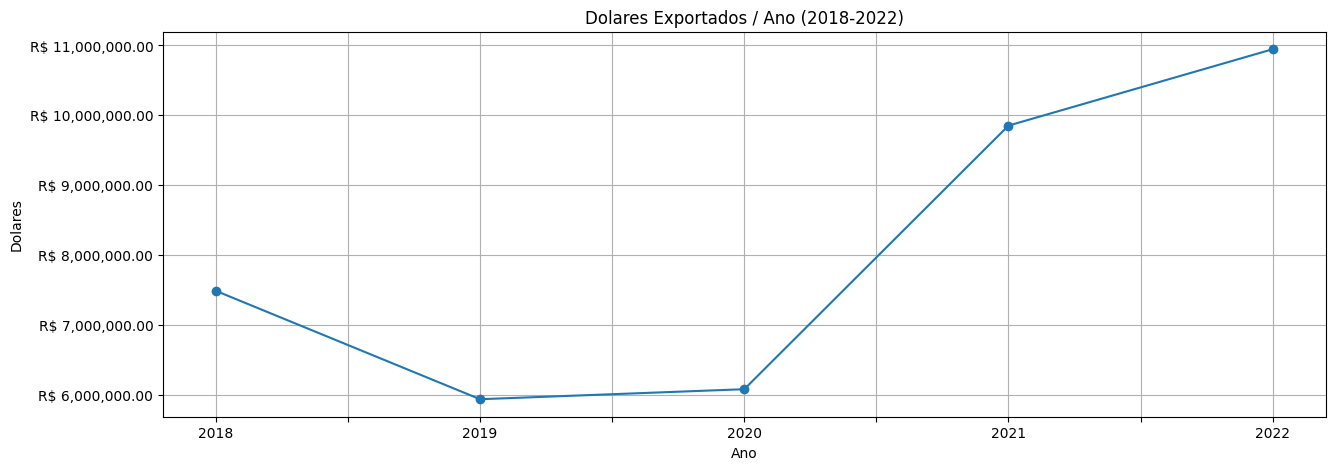

In [ ]:
axis = df_expVinho_dolares_sum['2018':'2022'].plot(kind='line', figsize=(15,5), marker='o')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.title('Dolares Exportados / Ano (2018-2022)')
plt.ylabel('Dolares')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

In [ ]:
df_expVinho_litros_pais = df_expVinho_litros.sum(axis=1)
df_expVinho_litros_pais = df_expVinho_litros_pais.sort_values(ascending=False)
df_expVinho_litros_pais.head(10)

,0
País,
Rússia,39029799
Paraguai,32995148
Estados Unidos,3793194
China,2583375
Haiti,2351248
Espanha,1993180
Reino Unido,1250877
Países Baixos,1238398
Japão,1204634


In [ ]:
df_expVinho_dolares_pais = df_expVinho_dolares.sum(axis=1)
df_expVinho_dolares_pais = df_expVinho_dolares_pais.sort_values(ascending=False)
df_expVinho_dolares_pais.head(10)

,0
País,
Paraguai,44236294
Rússia,25504484
Estados Unidos,10113658
China,4929621
Reino Unido,4796011
Espanha,3812723
Países Baixos,3796569
Haiti,3198869
"Alemanha, República Democrática",2578247


In [ ]:
preco_por_litro = pd.DataFrame({'Dólares por Litro': df_expVinho_dolares_pais/ df_expVinho_litros_pais})
preco_por_litro = preco_por_litro.sort_values(by='Dólares por Litro', ascending=False)
selected_columns = preco_por_litro.loc[['Estados Unidos', 'China', 'Reino Unido', 'Japão', 'Alemanha, República Democrática', 'Canadá']]
selected_columns.head(25)

,Dólares por Litro
País,
Estados Unidos,2.67
China,1.91
Reino Unido,3.83
Japão,2.02
"Alemanha, República Democrática",2.82
Canadá,5.50


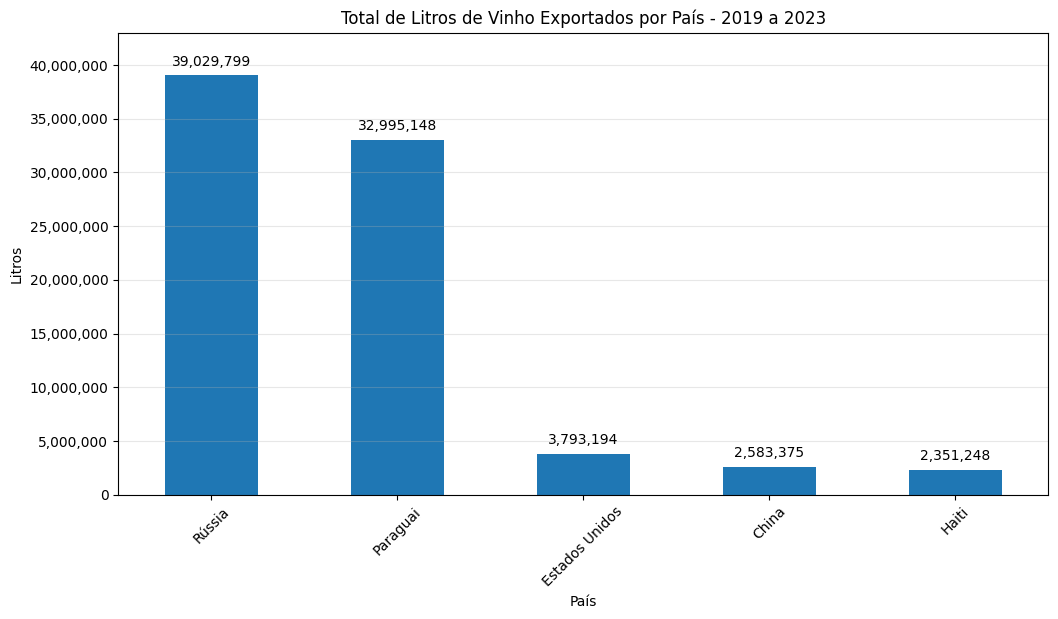

In [ ]:
total_litros_pais = df_expVinho_litros.sum(axis=1)
total_dolares_pais = df_expVinho_dolares.sum(axis=1)

plt.figure(figsize=(12, 6))
ax = total_litros_pais.sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Total de Litros de Vinho Exportados por País - 2019 a 2023")
plt.xlabel("País")
plt.xticks(rotation=45)
plt.ylabel("Litros")
plt.grid(True, axis='y', alpha=0.3)
plt.ylim(0,43000000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

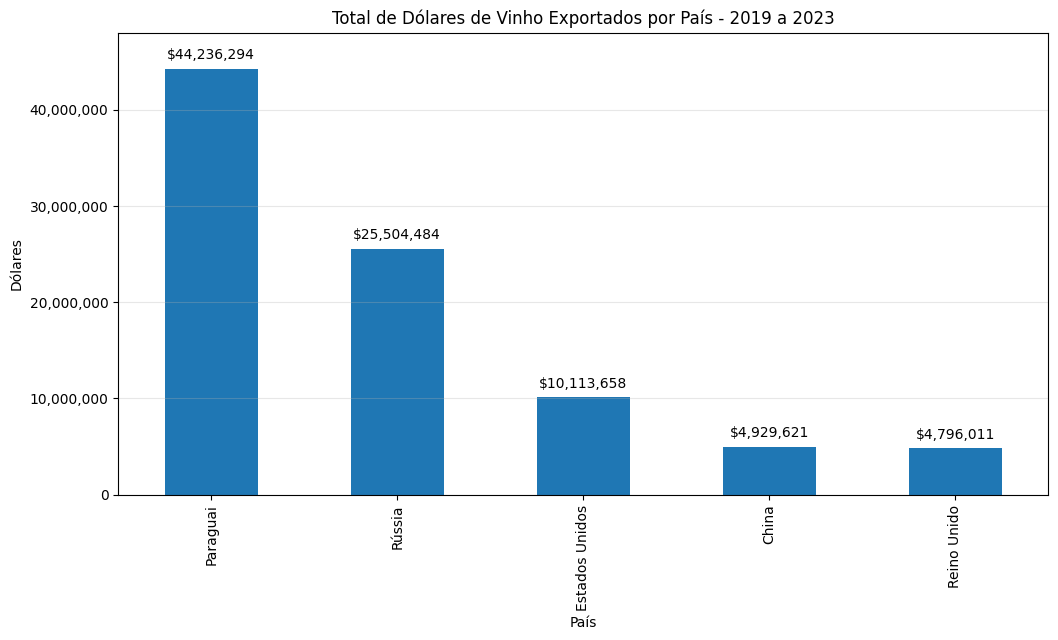

In [ ]:
plt.figure(figsize=(12, 6))
ax = total_dolares_pais.sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Total de Dólares de Vinho Exportados por País - 2019 a 2023")
plt.xlabel("País")
plt.ylabel("Dólares")
plt.grid(True, axis='y', alpha=0.3)
plt.ylim(0,48000000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


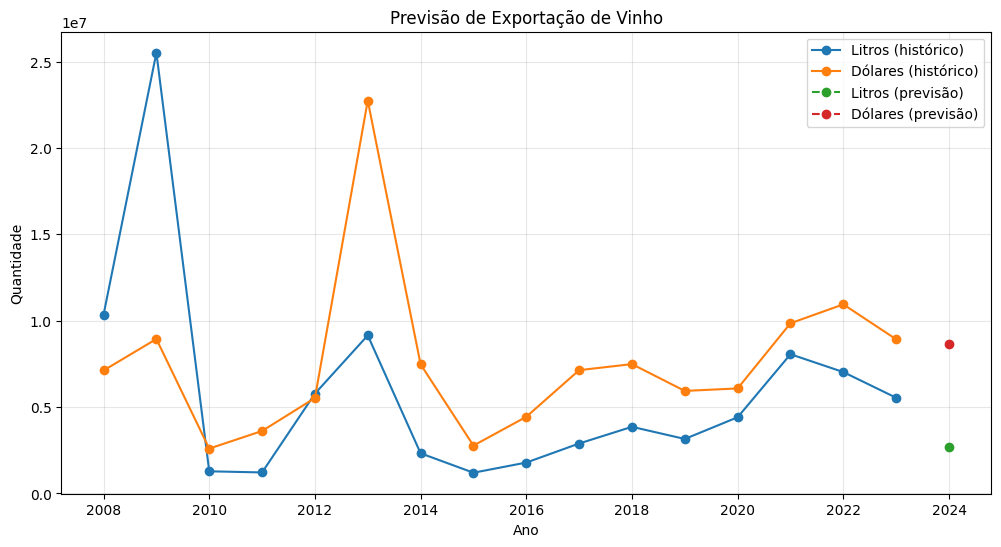

Previsão para 2024:
Litros: 2699054.38
Dólares: 8627672.05


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'Ano': df_expVinho_litros_sum.index.astype(int),
    'Litros': df_expVinho_litros_sum.values,
    'Dolares': df_expVinho_dolares_sum.values
})

X = df[['Ano']]
y_litros = df[['Litros']]
y_dolares = df[['Dolares']]

modelo_litros = LinearRegression()
modelo_dolares = LinearRegression()

modelo_litros.fit(X, y_litros)
modelo_dolares.fit(X, y_dolares)

anos_previsao = np.array([2024]).reshape(-1, 1)

previsao_litros = modelo_litros.predict(anos_previsao)
previsao_dolares = modelo_dolares.predict(anos_previsao)

plt.figure(figsize=(12, 6))
plt.plot(df['Ano'], df['Litros'], label='Litros (histórico)', marker='o')
plt.plot(df['Ano'], df['Dolares'], label='Dólares (histórico)', marker='o')
plt.plot(anos_previsao, previsao_litros, label='Litros (previsão)', linestyle='--', marker='o')
plt.plot(anos_previsao, previsao_dolares, label='Dólares (previsão)', linestyle='--', marker='o')
plt.title('Previsão de Exportação de Vinho')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Previsão para {anos_previsao[0][0]}:")
print(f"Litros: {previsao_litros[0][0]:.2f}")
print(f"Dólares: {previsao_dolares[0][0]:.2f}")

In [ ]:
df_expVinho_litros_sum.values


array([10346323, 25514198,  1280574,  1214834,  5775376,  9149059,
        2324029,  1198479,  1786549,  2889572,  3856162,  3152873,
        4409717,  8058704,  7025983,  5538888])

In [ ]:
dados_oiv = pd.read_csv("oiv_wine.csv")

In [ ]:
dados_oiv = dados_oiv.dropna()
dados_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Dried Grapes,Consumption,2009.00,tonnes,986
1,Asia,Afghanistan,Table Grapes,Consumption,2009.00,tonnes,257 849
2,Asia,Afghanistan,Dried Grapes,Exports,2009.00,tonnes,32 814
3,Asia,Afghanistan,Fresh Grapes,Exports,2009.00,tonnes,16 089
4,Asia,Afghanistan,Fresh Grapes,Imports,2009.00,tonnes,32 814
...,...,...,...,...,...,...,...
26762,Africa,Zimbabwe,Wine,Production,2021.00,1000 hl,14
26763,Africa,Zimbabwe,Wine,Consumption,2022.00,1000 hl,22
26764,Africa,Zimbabwe,Wine,Exports,2022.00,1000 hl,0
26765,Africa,Zimbabwe,Wine,Imports,2022.00,1000 hl,48


In [ ]:
dados_oiv['Quantity'] = dados_oiv['Quantity'].str.replace(' ', '', regex=True)
dados_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Dried Grapes,Consumption,2009.00,tonnes,986
1,Asia,Afghanistan,Table Grapes,Consumption,2009.00,tonnes,257849
2,Asia,Afghanistan,Dried Grapes,Exports,2009.00,tonnes,32814
3,Asia,Afghanistan,Fresh Grapes,Exports,2009.00,tonnes,16089
4,Asia,Afghanistan,Fresh Grapes,Imports,2009.00,tonnes,32814
...,...,...,...,...,...,...,...
26762,Africa,Zimbabwe,Wine,Production,2021.00,1000 hl,14
26763,Africa,Zimbabwe,Wine,Consumption,2022.00,1000 hl,22
26764,Africa,Zimbabwe,Wine,Exports,2022.00,1000 hl,0
26765,Africa,Zimbabwe,Wine,Imports,2022.00,1000 hl,48


In [ ]:
dados_oiv['Quantity'] = dados_oiv['Quantity'].str.strip()
dados_oiv['Quantity'] = pd.to_numeric(dados_oiv['Quantity'],)
dados_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity
0,Asia,Afghanistan,Dried Grapes,Consumption,2009.00,tonnes,986
1,Asia,Afghanistan,Table Grapes,Consumption,2009.00,tonnes,257849
2,Asia,Afghanistan,Dried Grapes,Exports,2009.00,tonnes,32814
3,Asia,Afghanistan,Fresh Grapes,Exports,2009.00,tonnes,16089
4,Asia,Afghanistan,Fresh Grapes,Imports,2009.00,tonnes,32814
...,...,...,...,...,...,...,...
26762,Africa,Zimbabwe,Wine,Production,2021.00,1000 hl,14
26763,Africa,Zimbabwe,Wine,Consumption,2022.00,1000 hl,22
26764,Africa,Zimbabwe,Wine,Exports,2022.00,1000 hl,0
26765,Africa,Zimbabwe,Wine,Imports,2022.00,1000 hl,48


In [ ]:
df = dados_oiv['Unit'].unique()
df

array(['tonnes', '1000\xa0hl'], dtype=object)

In [ ]:
def convert_to_1000hl(dados_oiv):
  if dados_oiv['Unit'] == 'tonnes':

    return dados_oiv['Quantity'] * 0.01
  else:
    return dados_oiv['Quantity']

dados_oiv['1000 hl'] = dados_oiv.apply(convert_to_1000hl, axis=1)
dados_oiv = dados_oiv[dados_oiv['Region/Country'] != 'Global']

In [ ]:
dados_oiv.head()

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,1000 hl
0,Asia,Afghanistan,Dried Grapes,Consumption,2009.00,tonnes,986,9.86
1,Asia,Afghanistan,Table Grapes,Consumption,2009.00,tonnes,257849,2578.49
2,Asia,Afghanistan,Dried Grapes,Exports,2009.00,tonnes,32814,328.14
3,Asia,Afghanistan,Fresh Grapes,Exports,2009.00,tonnes,16089,160.89
4,Asia,Afghanistan,Fresh Grapes,Imports,2009.00,tonnes,32814,328.14


In [ ]:
wine_oiv = dados_oiv[dados_oiv['Product'] == 'Wine']
wine_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,1000 hl
15576,Asia,Afghanistan,Wine,Consumption,2009.00,1000 hl,3,3.00
15577,Asia,Afghanistan,Wine,Imports,2009.00,1000 hl,3,3.00
15578,Asia,Afghanistan,Wine,Production,2009.00,1000 hl,0,0.00
15579,Asia,Afghanistan,Wine,Consumption,2010.00,1000 hl,2,2.00
15580,Asia,Afghanistan,Wine,Imports,2010.00,1000 hl,2,2.00
...,...,...,...,...,...,...,...,...
26762,Africa,Zimbabwe,Wine,Production,2021.00,1000 hl,14,14.00
26763,Africa,Zimbabwe,Wine,Consumption,2022.00,1000 hl,22,22.00
26764,Africa,Zimbabwe,Wine,Exports,2022.00,1000 hl,0,0.00
26765,Africa,Zimbabwe,Wine,Imports,2022.00,1000 hl,48,48.00


In [ ]:
imports_wine_oiv = wine_oiv[wine_oiv['Variable'] == 'Imports']
imports_wine_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,1000 hl
15577,Asia,Afghanistan,Wine,Imports,2009.00,1000 hl,3,3.00
15580,Asia,Afghanistan,Wine,Imports,2010.00,1000 hl,2,2.00
15583,Asia,Afghanistan,Wine,Imports,2011.00,1000 hl,1,1.00
15586,Asia,Afghanistan,Wine,Imports,2012.00,1000 hl,1,1.00
15589,Asia,Afghanistan,Wine,Imports,2013.00,1000 hl,0,0.00
...,...,...,...,...,...,...,...,...
26749,Africa,Zimbabwe,Wine,Imports,2018.00,1000 hl,25,25.00
26753,Africa,Zimbabwe,Wine,Imports,2019.00,1000 hl,3,3.00
26757,Africa,Zimbabwe,Wine,Imports,2020.00,1000 hl,10,10.00
26761,Africa,Zimbabwe,Wine,Imports,2021.00,1000 hl,26,26.00


In [ ]:
production_wine_oiv = wine_oiv[wine_oiv['Variable'] == 'Production']
production_wine_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,1000 hl
15578,Asia,Afghanistan,Wine,Production,2009.00,1000 hl,0,0.00
15581,Asia,Afghanistan,Wine,Production,2010.00,1000 hl,0,0.00
15584,Asia,Afghanistan,Wine,Production,2011.00,1000 hl,0,0.00
15587,Asia,Afghanistan,Wine,Production,2012.00,1000 hl,0,0.00
15590,Asia,Afghanistan,Wine,Production,2013.00,1000 hl,0,0.00
...,...,...,...,...,...,...,...,...
26750,Africa,Zimbabwe,Wine,Production,2018.00,1000 hl,20,20.00
26754,Africa,Zimbabwe,Wine,Production,2019.00,1000 hl,14,14.00
26758,Africa,Zimbabwe,Wine,Production,2020.00,1000 hl,14,14.00
26762,Africa,Zimbabwe,Wine,Production,2021.00,1000 hl,14,14.00


In [ ]:
df_imports_anual = imports_wine_oiv[['Year', 'Quantity']].groupby('Year', as_index=False).sum()

df_imports_anual

,Year,Quantity
0,2009.00,82486
1,2010.00,88899
2,2011.00,93815
3,2012.00,94909
4,2013.00,95546
5,2014.00,98999
6,2015.00,98469
7,2016.00,97327
8,2017.00,101639
9,2018.00,96789


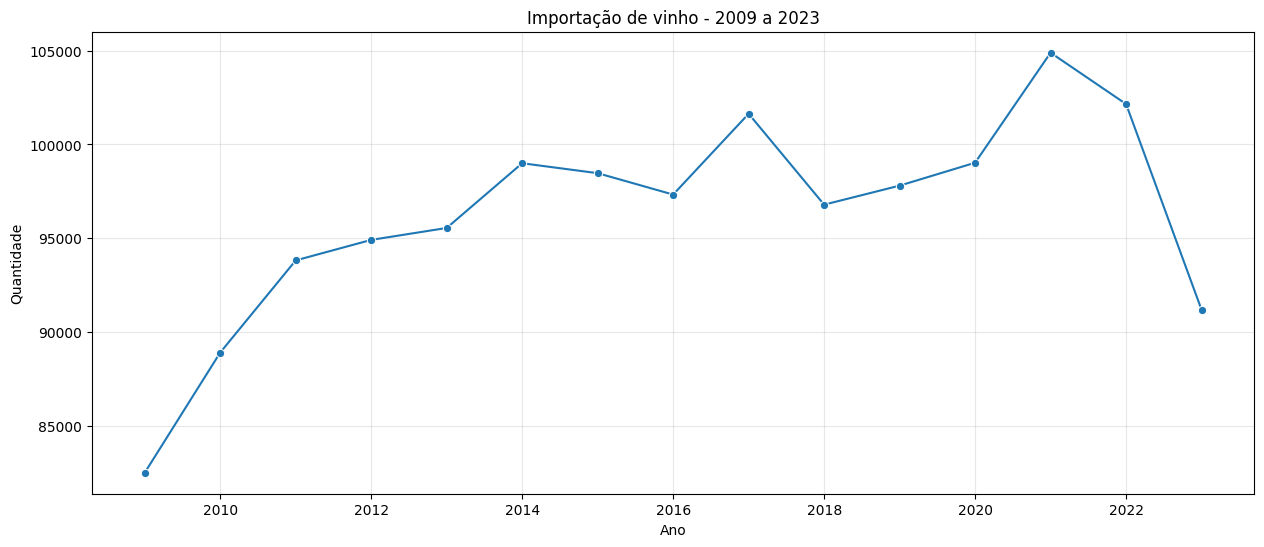

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,6))

imports_anual = sns.lineplot(x=df_imports_anual['Year'], y=df_imports_anual['Quantity'], marker='o')
plt.title('Importação de vinho - 2009 a 2023')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
top_5_importers = imports_wine_oiv.groupby('Region/Country')['Quantity'].sum().sort_values(ascending=False).head(6)
top_5_importers

,Quantity
Region/Country,
Germany,222565
United Kingdom,198541
United States of America,173183
France,97848
Russia,64277
Netherlands,61386


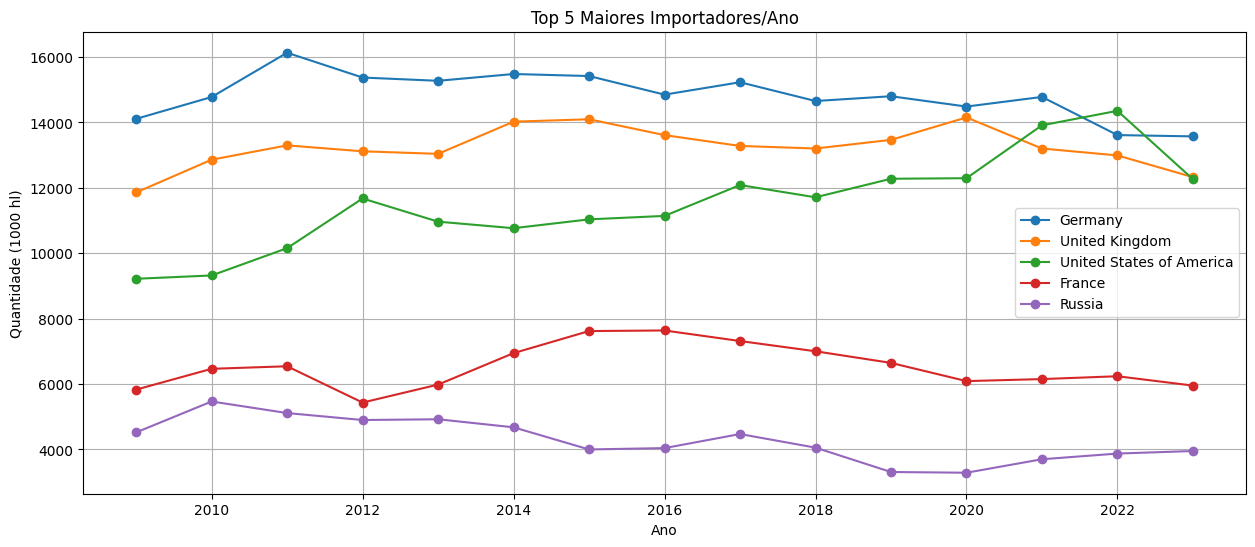

In [ ]:
top_5_countries = imports_wine_oiv.groupby('Region/Country')['Quantity'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(15, 6))

for country in top_5_countries:
    country_data = imports_wine_oiv[imports_wine_oiv['Region/Country'] == country]
    plt.plot(country_data['Year'], country_data['Quantity'], marker='o', label=country)

plt.title('Top 5 Maiores Importadores/Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade (1000 hl)')
plt.legend()
plt.grid(True)
plt.show()

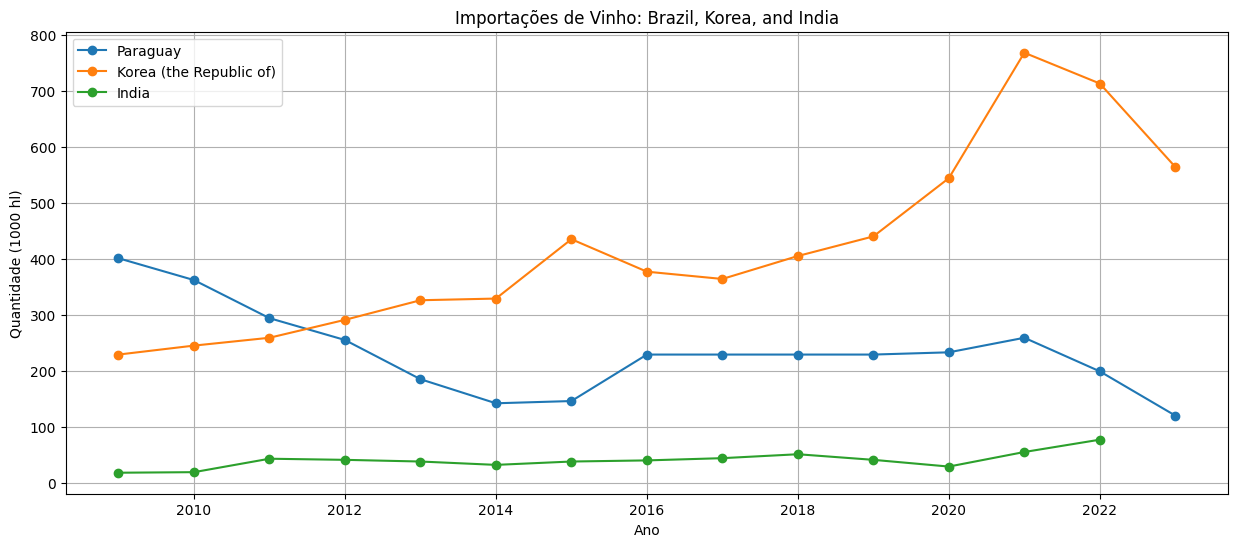

In [ ]:
filtered_imports = imports_wine_oiv[imports_wine_oiv['Region/Country'].isin(["Paraguay", "Korea (the Republic of)", "India"])]

plt.figure(figsize=(15, 6))
for country in ["Paraguay", "Korea (the Republic of)", "India"]:
    country_data = filtered_imports[filtered_imports['Region/Country'] == country]
    plt.plot(country_data['Year'], country_data['Quantity'], marker='o', label=country)

plt.title('Importações de Vinho: Brazil, Korea, and India')
plt.xlabel('Ano')
plt.ylabel('Quantidade (1000 hl)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


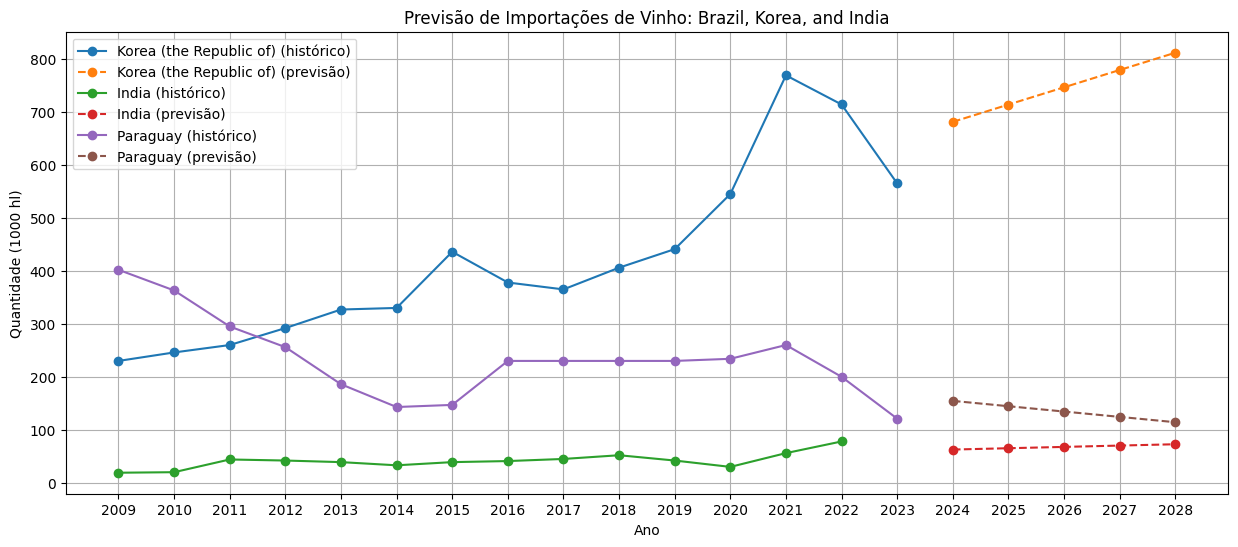

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

country_models = {}

for country in ["Korea (the Republic of)", "India", "Paraguay"]:
    country_data = filtered_imports[filtered_imports['Region/Country'] == country]
    X = country_data[['Year']]
    y = country_data[['Quantity']]
    model = LinearRegression()
    model.fit(X, y)
    country_models[country] = model

future_years = np.arange(2024, 2029).reshape(-1, 1)

predictions = {}
for country, model in country_models.items():
    predictions[country] = model.predict(future_years)


plt.figure(figsize=(15, 6))
for country in ["Korea (the Republic of)", "India", "Paraguay"]:
    country_data = filtered_imports[filtered_imports['Region/Country'] == country]
    plt.plot(country_data['Year'], country_data['Quantity'], marker='o', label=country + ' (histórico)')
    plt.plot(future_years, predictions[country], linestyle='--', marker='o', label=country + ' (previsão)')

plt.title('Previsão de Importações de Vinho: Brazil, Korea, and India')
plt.xlabel('Ano')
plt.ylabel('Quantidade (1000 hl)')
plt.legend()
plt.grid(True)

plt.xticks(np.arange(min(filtered_imports['Year']), max(future_years.flatten()) + 1, 1))

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


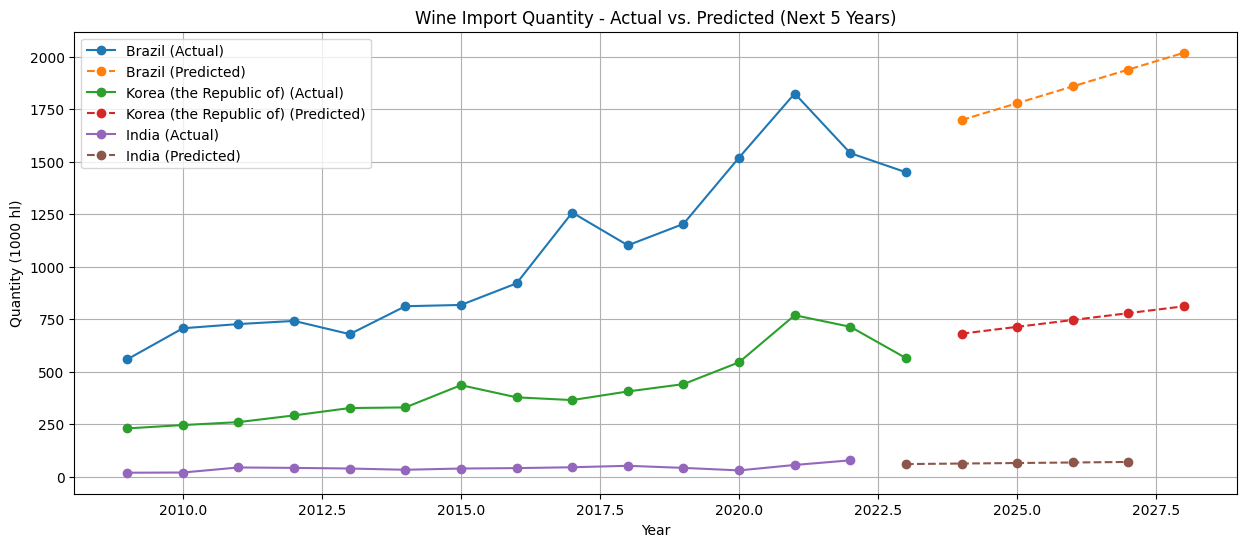

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


filtered_data = imports_wine_oiv[imports_wine_oiv['Region/Country'].isin(["Brazil", "Korea (the Republic of)", "India"])]

predictions = {}

for country in ["Brazil", "Korea (the Republic of)", "India"]:
    country_data = filtered_data[filtered_data['Region/Country'] == country]

    if len(country_data) > 1:
        X = country_data[['Year']]
        y = country_data[['Quantity']]
        model = LinearRegression()
        model.fit(X, y)

        future_years = np.arange(country_data['Year'].max() + 1, country_data['Year'].max() + 6).reshape(-1, 1)
        predicted_quantities = model.predict(future_years)

        predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_Quantity': predicted_quantities.flatten()})
        predictions_df['Region/Country'] = country
        predictions[country] = predictions_df
    else:
        print(f"Not enough data to generate predictions for {country}.")

all_predictions = pd.concat(predictions.values())

plt.figure(figsize=(15, 6))
for country in ["Brazil", "Korea (the Republic of)", "India"]:
    country_data = filtered_data[filtered_data['Region/Country'] == country]
    plt.plot(country_data['Year'], country_data['Quantity'], marker='o', label=country + ' (Actual)')

    predictions_to_plot = all_predictions[(all_predictions['Region/Country'] == country)]
    plt.plot(predictions_to_plot['Year'], predictions_to_plot['Predicted_Quantity'],
             linestyle='--', marker='o', label=country + ' (Predicted)')

plt.title('Wine Import Quantity - Actual vs. Predicted (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Quantity (1000 hl)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
consumo_wine_oiv = wine_oiv[wine_oiv['Variable'] == 'Consumption']
consumo_wine_oiv

,Continent,Region/Country,Product,Variable,Year,Unit,Quantity,1000 hl
15576,Asia,Afghanistan,Wine,Consumption,2009.00,1000 hl,3,3.00
15579,Asia,Afghanistan,Wine,Consumption,2010.00,1000 hl,2,2.00
15582,Asia,Afghanistan,Wine,Consumption,2011.00,1000 hl,1,1.00
15585,Asia,Afghanistan,Wine,Consumption,2012.00,1000 hl,1,1.00
15588,Asia,Afghanistan,Wine,Consumption,2013.00,1000 hl,1,1.00
...,...,...,...,...,...,...,...,...
26747,Africa,Zimbabwe,Wine,Consumption,2018.00,1000 hl,38,38.00
26751,Africa,Zimbabwe,Wine,Consumption,2019.00,1000 hl,31,31.00
26755,Africa,Zimbabwe,Wine,Consumption,2020.00,1000 hl,17,17.00
26759,Africa,Zimbabwe,Wine,Consumption,2021.00,1000 hl,22,22.00


In [ ]:
df_consumo_anual = consumo_wine_oiv[['Year', 'Quantity']].groupby('Year', as_index=False).sum()

df_consumo_anual

,Year,Quantity
0,2009.00,226426
1,2010.00,224287
2,2011.00,224832
3,2012.00,223528
4,2013.00,225613
5,2014.00,221875
6,2015.00,220873
7,2016.00,223527
8,2017.00,224964
9,2018.00,221181


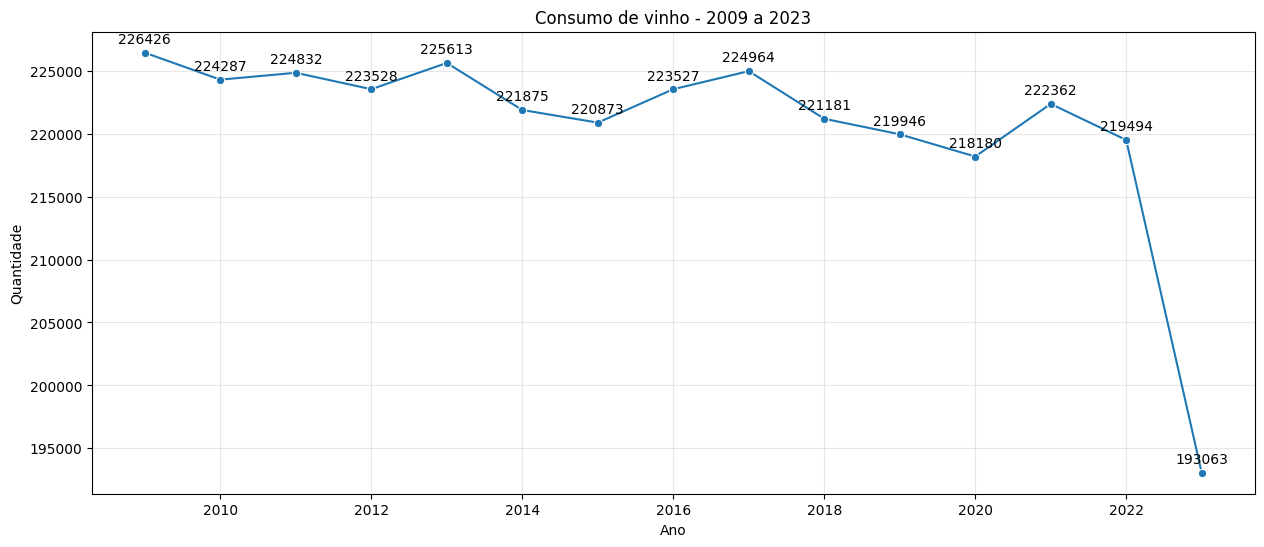

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

consumo_anual = sns.lineplot(x=df_consumo_anual['Year'], y=df_consumo_anual['Quantity'], marker='o')

plt.title('Consumo de vinho - 2009 a 2023')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True, alpha=0.3)


for x, y in zip(df_consumo_anual['Year'], df_consumo_anual['Quantity']):
    plt.text(x, y + 500, f'{y:.0f}', ha='center', va='bottom')  # Adjust 500 for vertical offset

plt.show()

In [ ]:
df_consumo_europa_eua = consumo_wine_oiv[['Region/Country','Year', 'Quantity']]
df_consumo_europa_eua.head()

,Region/Country,Year,Quantity
15576,Afghanistan,2009.00,3
15579,Afghanistan,2010.00,2
15582,Afghanistan,2011.00,1
15585,Afghanistan,2012.00,1
15588,Afghanistan,2013.00,1


In [ ]:
df_consumo_europa_eua = df_consumo_europa_eua.query('`Region/Country` in ["United States of America", "France", "Italy"]')
df_consumo_europa_eua.head()


,Region/Country,Year,Quantity
19255,France,2009.00,30214
19259,France,2010.00,29272
19263,France,2011.00,28307
19267,France,2012.00,28022
19271,France,2013.00,27770


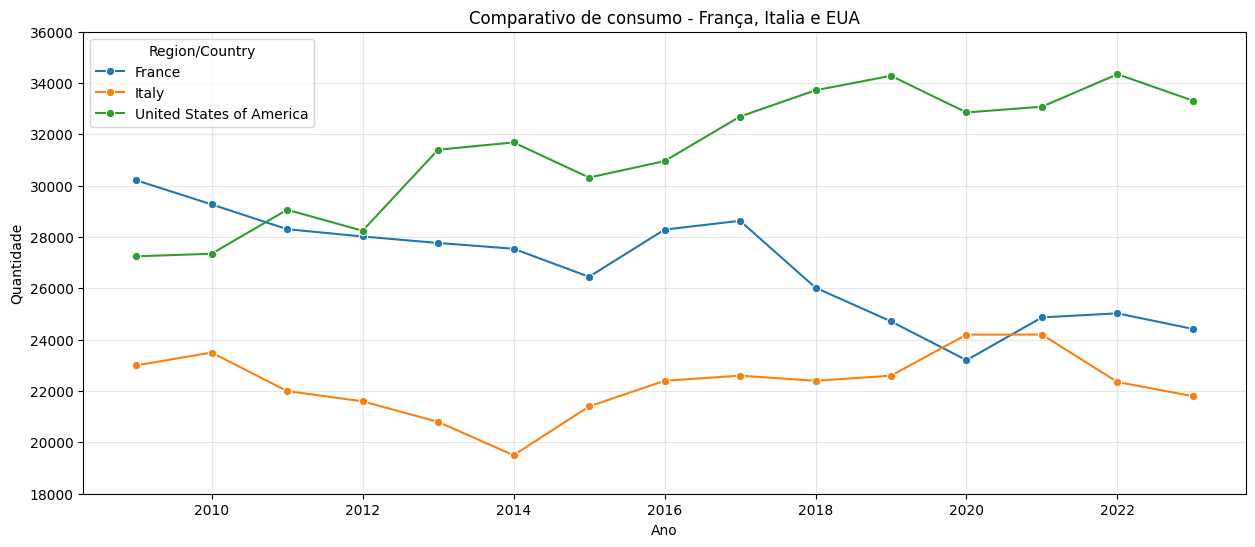

In [ ]:
plt.figure(figsize=(15, 6))

consumo_europa = sns.lineplot(data=df_consumo_europa_eua, x='Year', y='Quantity', hue='Region/Country', marker='o')

plt.title('Comparativo de consumo - França, Italia e EUA')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True, alpha=0.3)
plt.ylim(18000, 36000)

plt.show()

In [ ]:
df_consumo_alvos_vinibrasil = consumo_wine_oiv[['Region/Country','Year', 'Quantity']].query('`Region/Country` in ["United States of America", "United Kingdom", "Japan"]')
df_consumo_alvos_vinibrasil.head()


,Region/Country,Year,Quantity
20770,Japan,2009.00,2533
20774,Japan,2010.00,2610
20778,Japan,2011.00,2778
20782,Japan,2012.00,3120
20786,Japan,2013.00,3398


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


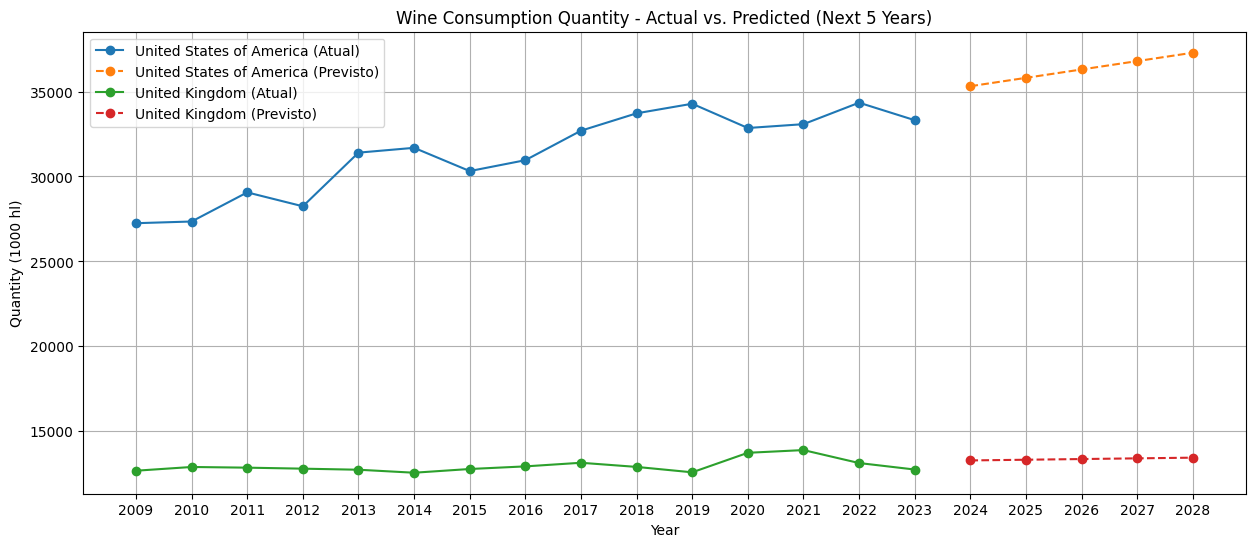

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


filtered_data = df_consumo_alvos_vinibrasil[df_consumo_alvos_vinibrasil['Region/Country'].isin(["United States of America", "United Kingdom"])]

predictions = {}

for country in ["United States of America", "United Kingdom"]:
    country_data = filtered_data[filtered_data['Region/Country'] == country]

    if len(country_data) > 1:
        X = country_data[['Year']]
        y = country_data[['Quantity']]
        model = LinearRegression()
        model.fit(X, y)

        future_years = np.arange(country_data['Year'].max() + 1, country_data['Year'].max() + 6).reshape(-1, 1)
        predicted_quantities = model.predict(future_years)

        predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_Quantity': predicted_quantities.flatten()})
        predictions_df['Region/Country'] = country
        predictions[country] = predictions_df
    else:
        print(f"Not enough data to generate predictions for {country}.")

all_predictions = pd.concat(predictions.values())

plt.figure(figsize=(15, 6))
for country in ["United States of America", "United Kingdom"]:
    country_data = filtered_data[filtered_data['Region/Country'] == country]
    plt.plot(country_data['Year'], country_data['Quantity'], marker='o', label=country + ' (Atual)')

    predictions_to_plot = all_predictions[(all_predictions['Region/Country'] == country)]
    plt.plot(predictions_to_plot['Year'], predictions_to_plot['Predicted_Quantity'],
             linestyle='--', marker='o', label=country + ' (Previsto)')

plt.title('Wine Consumption Quantity - Actual vs. Predicted (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Quantity (1000 hl)')
plt.legend()
plt.grid(True)

plt.xticks(np.arange(min(filtered_data['Year']), max(all_predictions['Year']) + 1, 1))

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


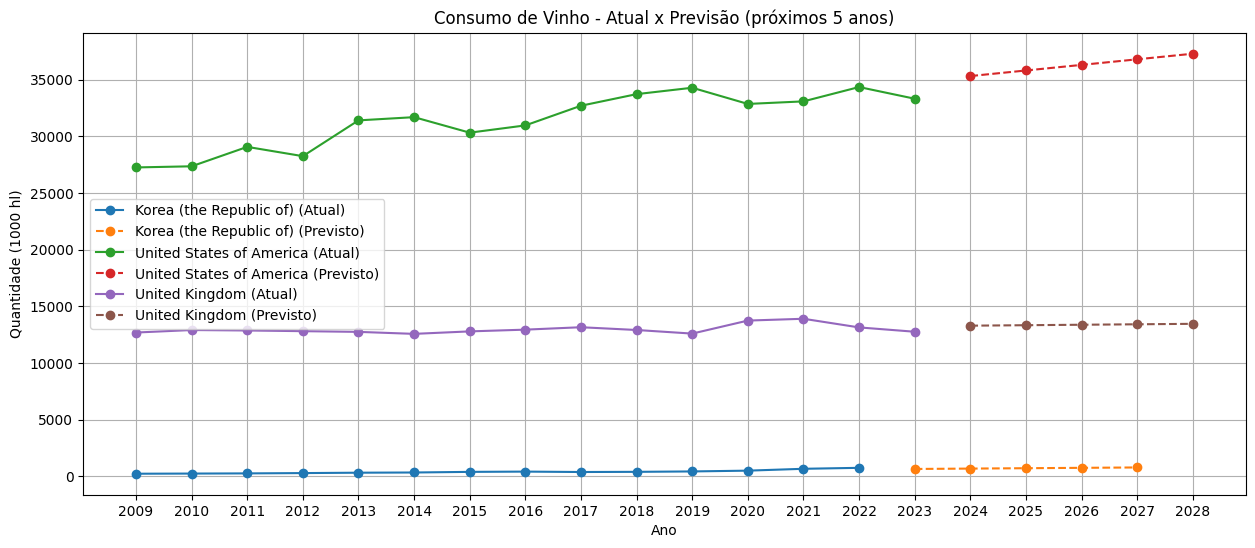

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

countries = ["Korea (the Republic of)", "United States of America", "United Kingdom"]
filtered_data = consumo_wine_oiv[consumo_wine_oiv['Region/Country'].isin(countries)]

predictions = {}

for country in countries:
    country_data = filtered_data[filtered_data['Region/Country'] == country]

    if len(country_data) > 1:
        X = country_data[['Year']]
        y = country_data[['Quantity']]
        model = LinearRegression()
        model.fit(X, y)

        future_years = np.arange(country_data['Year'].max() + 1, country_data['Year'].max() + 6).reshape(-1, 1)
        predicted_quantities = model.predict(future_years)

        predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_Quantity': predicted_quantities.flatten()})
        predictions_df['Region/Country'] = country
        predictions[country] = predictions_df
    else:
        print(f"Sem dados suficientes para prever o país {country}.")

all_predictions = pd.concat(predictions.values())

plt.figure(figsize=(15, 6))
for country in countries:
    country_data = filtered_data[filtered_data['Region/Country'] == country]
    plt.plot(country_data['Year'], country_data['Quantity'], marker='o', label=country + ' (Atual)')

    predictions_to_plot = all_predictions[(all_predictions['Region/Country'] == country)]
    plt.plot(predictions_to_plot['Year'], predictions_to_plot['Predicted_Quantity'],
             linestyle='--', marker='o', label=country + ' (Previsto)')

plt.title('Consumo de Vinho - Atual x Previsão (próximos 5 anos)')
plt.xlabel('Ano')
plt.ylabel('Quantidade (1000 hl)')
plt.legend()
plt.grid(True)

plt.xticks(np.arange(min(filtered_data['Year']), max(all_predictions['Year']) + 1, 1))

plt.show()


In [ ]:
df_consumo_br_asia = consumo_wine_oiv[['Continent','Region/Country','Year', 'Quantity']]
df_consumo_br_asia.head()

,Continent,Region/Country,Year,Quantity
15576,Asia,Afghanistan,2009.00,3
15579,Asia,Afghanistan,2010.00,2
15582,Asia,Afghanistan,2011.00,1
15585,Asia,Afghanistan,2012.00,1
15588,Asia,Afghanistan,2013.00,1


In [ ]:
df_consumo_br_asia = df_consumo_br_asia.query('`Region/Country` in ["Brazil", "Korea (the Republic of)", "India"]')
df_consumo_br_asia

,Continent,Region/Country,Year,Quantity
16958,America,Brazil,2009.00,3508
16962,America,Brazil,2010.00,3686
16966,America,Brazil,2011.00,3625
16970,America,Brazil,2012.00,3198
16974,America,Brazil,2013.00,3488
16978,America,Brazil,2014.00,3233
16982,America,Brazil,2015.00,3270
16986,America,Brazil,2016.00,3112
16990,America,Brazil,2017.00,3278
16994,America,Brazil,2018.00,3285


In [ ]:
china_agrup = df_consumo_br_asia[df_consumo_br_asia['Region/Country']=='China'].groupby(['Region/Country', 'Year'], as_index=False)['Quantity'].sum()

df_consumo_br_asia = df_consumo_br_asia[df_consumo_br_asia['Region/Country'] != 'China']

df_consumo_br_asia = pd.concat([df_consumo_br_asia, china_agrup])
df_consumo_br_asia

,Continent,Region/Country,Year,Quantity
16958,America,Brazil,2009.00,3508
16962,America,Brazil,2010.00,3686
16966,America,Brazil,2011.00,3625
16970,America,Brazil,2012.00,3198
16974,America,Brazil,2013.00,3488
16978,America,Brazil,2014.00,3233
16982,America,Brazil,2015.00,3270
16986,America,Brazil,2016.00,3112
16990,America,Brazil,2017.00,3278
16994,America,Brazil,2018.00,3285


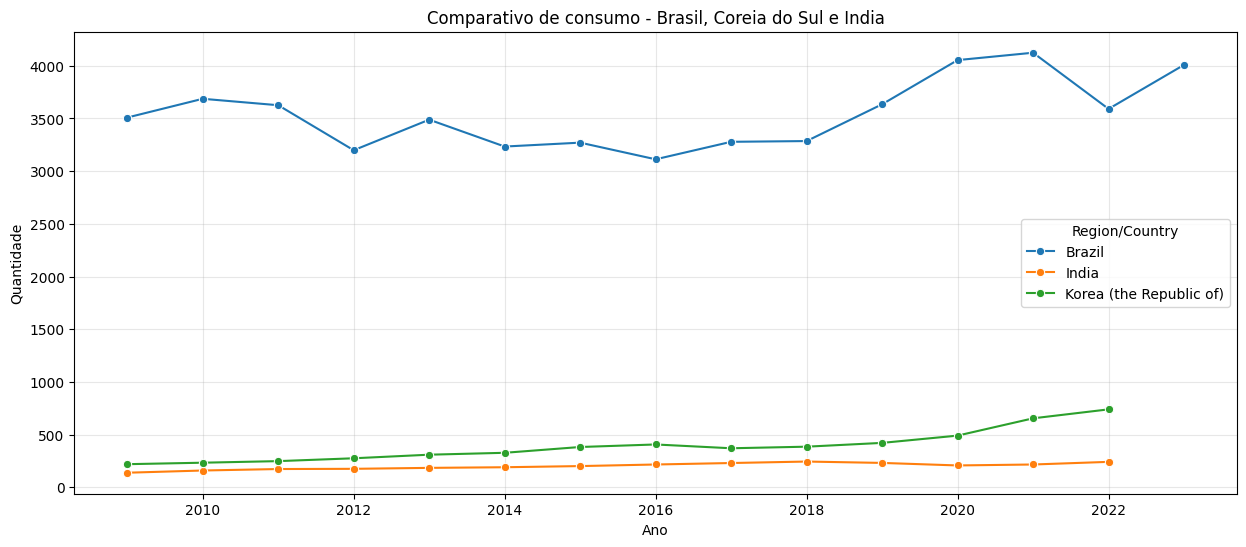

In [ ]:
plt.figure(figsize=(15, 6))

consumo_br_asia = sns.lineplot(data=df_consumo_br_asia, x='Year', y='Quantity', hue='Region/Country', marker='o')

plt.title('Comparativo de consumo - Brasil, Coreia do Sul e India')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.grid(True, alpha=0.3)
#plt.ylim(0, 21000)

plt.show()